<font color="orange">

# Análisis de Perfiles en la Diáspora Colombiana con Machine Learning
</font>


- **Autores:** [Jhon Galeano](https://github.com/jhongaleano09)
- **Dataset:** [Registro Consular de Colombianos en el Exterior](https://www.datos.gov.co/Estad-sticas-Nacionales/Colombianos-registrados-en-el-exterior/y399-rzwf/about_data) (Datos Abiertos Colombia)
- **Fecha:** 02/08/2025

---

### 1. Resumen Ejecutivo

Este proyecto aplica técnicas de **aprendizaje no supervisado** para segmentar y caracterizar a la diáspora colombiana, utilizando un conjunto de datos de **1.65 millones de registros consulares**. A diferencia de los análisis estadísticos tradicionales que ofrecen una visión agregada, nuestro objetivo es descubrir arquetipos migratorios latentes que no son evidentes a simple vista.

Mediante algoritmos de **clustering**, identificaremos grupos homogéneos basados en variables demográficas, geográficas y académicas. Posteriormente, estos segmentos serán interpretados para construir perfiles claros y accionables (ej: "profesionales jóvenes en Norteamérica", "familias establecidas en Europa"). Este enfoque permite una comprensión más profunda y granular de los patrones migratorios, sentando las bases para análisis predictivos futuros.

### 2. Metodología y Enfoque

Nuestra estrategia se divide en los siguientes pasos clave:

1.  **Análisis Exploratorio (EDA):** LInspección, limpieza y visualización de los datos para comprender sus distribuciones, identificar anomalías y extraer insights iniciales.
2.  **Clustering (Aprendizaje No Supervisado):** Aplicación del algoritmo K-Means para agrupar a los individuos en clusters basados en sus características intrínsecas.
3.  **Caracterización e interpretación de Perfiles:** Análisis de las propiedades de cada cluster para definir y nombrar los perfiles migratorios emergentes.
4.  **Modelado Predictivo (Aprendizaje Supervisado):** Utilización de los clusters como etiquetas para entrenar un modelo de clasificación que permita identificar las variables más determinantes para cada perfil.

> 💡 **Hipótesis Central:** Creemos que existen perfiles migratorios estadísticamente distintos que los análisis descriptivos tradicionales no capturan. Nuestra meta es que los datos mismos, a través del clustering, revelen estas estructuras.

> ‼️ **Nota sobre los Datos:** Este análisis se basa en el registro consular. Es importante notar que esto puede no ser representativo de *toda* la diáspora, ya que excluye a quienes no se registran. Los hallazgos se interpretan con esta consideración.

### 3. Configuración del Entorno de trabajo.
Antes de iniciar, preparamos el entorno de trabajo. Este paso es fundamental para garantizar la reproducibilidad del análisis. A continuación, instalamos las dependencias y cargamos las librerías necesarias.

#### 4.1. Instalación de Dependencias
Para asegurar que el notebook se ejecute sin errores en cualquier entorno, instalamos las librerías especificadas en el archivo requirements.txt. Este enfoque permite que cualquier otro analista o sistema automatizado replique nuestro trabajo fácilmente.

In [1]:
import sys
# Instala los paquetes desde el archivo requirements.txt que está en el directorio raíz (../)
!{sys.executable} -m pip install -r ../requirements.txt


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 3.2. Impotación de librerias y modulos
Cargamos las librerías de Python que utilizaremos para la manipulación de datos, visualización y modelado. Siguiendo las buenas prácticas, hemos organizado nuestro código en módulos personalizados (src), que también son importados aquí para mantener el notebook limpio y enfocado en la narrativa del análisis.

In [2]:
# --- Configuración Inicial ---

# --- librerias estandar de python ---
import os
import sys

# --- librerías de terceros 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


warnings.filterwarnings('ignore')

# Añade la raíz del proyecto al sys.path para encontrar el directorio 'src'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Ruta del proyecto añadida al path: {project_root}")

# Importa los módulos personalizados desde 'src'
from src.data_preprocessing import load_data
from src.visualization import display_descriptive_stats

print("\n¡Módulos personalizados cargados exitosamente desde src/!")

Ruta del proyecto añadida al path: C:\Users\decid\Downloads\colombian-diaspora-analysis

¡Módulos personalizados cargados exitosamente desde src/!


### 4. Adquisición y Comprensión de los Datos
#### 4.1. Carga del Dataset

Iniciamos el análisis cargando el conjunto de datos desde su fuente en crudo (/data/raw). Este archivo, con 1.65 millones de registros, es la piedra angular de nuestro proyecto. La siguiente celda de código utiliza una función personalizada (load_data) para encapsular este proceso, promoviendo la reutilización de código y la claridad.

In [3]:
# Define la ruta al dataset y cárgalo
file_name = 'Colombianos_registrados_en_el_exterior_20250329.csv'
full_file_path = os.path.join(project_root, 'data', 'raw', file_name)

df_migracion = load_data(full_file_path)

# Muestra una previsualización para confirmar la carga
if df_migracion is not None:
    print("\nPrevisualización del DataFrame cargado:")
    display(df_migracion.head(3))

Cargando dataset desde: C:\Users\decid\Downloads\colombian-diaspora-analysis\data\raw\Colombianos_registrados_en_el_exterior_20250329.csv
¡Dataset cargado exitosamente!

Previsualización del DataFrame cargado:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
0,AFGANISTAN,AFG,KABOL/KABUL,C. NUEVA DELHI,ADULTO,34,NO INDICA,NO INDICA,NO INDICA,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,-1,(NO REGISTRA),"(33.93911, 67.709953)",2014-09,1
1,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10,1
2,ALEMANIA,DEU,BERLIN/BERLIN,C. BERLIN,ADOLESCENTE,12,NINGUNA,NINGUNA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,-1,ALEMANIA/BERLIN/BERLIN,"(51.165691, 10.451526)",2023-02,1


#### 4.2. Exploración Inicial (Data Understanding)

Una vez cargados los datos, realizamos una revisión estructural para entender su composición y calidad inicial. Este diagnóstico temprano es clave para planificar el preprocesamiento. Nos enfocaremos en:

- **Tipos de Datos y Nulos** Usamos .info() para obtener un resumen de los tipos de datos de cada columna y detectar la presencia de valores nulos. Es crucial verificar que las variables numéricas y categóricas estén correctamente formateadas.

- **Cardinalidad de las Variables:** Con .nunique(), medimos el número de valores únicos por columna. Esto nos ayuda a identificar variables categóricas con demasiadas categorías (alta cardinalidad), como Ciudad de Residencia o Ciudad de Nacimiento, que necesitarán una estrategia de tratamiento específica antes del modelado.

In [4]:
# Obtener información general del DataFrame (tipos de datos y valores no nulos)
df_migracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652685 entries, 0 to 1652684
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   País                   1652685 non-null  object
 1   Código ISO país        1652685 non-null  object
 2   Ciudad de Residencia   1652685 non-null  object
 3   Oficina de registro    1652685 non-null  object
 4   Grupo edad             1652685 non-null  object
 5   Edad (años)            1652685 non-null  int64 
 6   Área Conocimiento      1652685 non-null  object
 7   Sub Area Conocimiento  1652685 non-null  object
 8   Nivel Académico        1652685 non-null  object
 9   Estado civil           1652685 non-null  object
 10  Género                 1652685 non-null  object
 11  Etnia de la persona    1652685 non-null  object
 12  Estatura (CM)          1652685 non-null  int64 
 13  Ciudad de Nacimiento   1652685 non-null  object
 14  Localización           1652685 non

In [5]:
# Realizar un conteo de valores únicos por columna para entender la cardinalidad
df_migracion.nunique()

País                       193
Código ISO país            188
Ciudad de Residencia     38671
Oficina de registro        127
Grupo edad                   7
Edad (años)                132
Área Conocimiento           14
Sub Area Conocimiento       65
Nivel Académico             12
Estado civil                 8
Género                       4
Etnia de la persona          8
Estatura (CM)              211
Ciudad de Nacimiento     12259
Localización               186
Fecha de Registro          147
Cantidad de personas        26
dtype: int64

### 5. Limpieza y Preprocesamiento de Datos
#### 5.1. Aplicación de Limpieza Inicial

La calidad de los insights y del modelo final depende directamente de la rigurosidad en la limpieza de los datos. En esta fase, ejecutamos una función modular (clean_data) que encapsula las siguientes tareas críticas de preprocesamiento:

- **Manejo de Valores Inconsistentes:** Se reemplazan los marcadores de datos faltantes o no especificados (como -1, 'NO INDICA', 'NINGUNA') con valores NaN de NumPy para un tratamiento estandarizado.

- **Corrección de Tipos de Datos:** Se convierte Fecha de Registro a formato datetime para permitir análisis basados en el tiempo.

- **Ingeniería de Características (Feature Engineering):** Se extrae el año de la Fecha de Registro para crear la variable Año Registro, útil para análisis de tendencias temporales.

Este enfoque funcional no solo hace el notebook más legible, sino que también crea un componente de limpieza reutilizable, esencial para la reproducibilidad y futura automatización

In [6]:
# Importa la función de limpieza y aplícala al DataFrame
from src.data_preprocessing import clean_data
# Limpia el DataFrame de migración
df_migracion_limpio = clean_data(df_migracion.copy())

# Muestra una previsualización del DataFrame limpio
print("\nDataFrame después de la limpieza:")
display(df_migracion_limpio.head(3))

Iniciando limpieza de datos...
Limpieza finalizada. Forma del DataFrame: (1652685, 18)

DataFrame después de la limpieza:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas,Año Registro
0,AFGANISTAN,AFG,KABOL/KABUL,C. NUEVA DELHI,ADULTO,34.000000,NO INDICA,NO INDICA,NO INDICA,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,165.152863,(NO REGISTRA),"(33.93911, 67.709953)",2014-09-01,1,2014
1,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,43.920877,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,165.152863,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10-01,1,2015
2,ALEMANIA,DEU,BERLIN/BERLIN,C. BERLIN,ADOLESCENTE,12.000000,NINGUNA,NINGUNA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,165.152863,ALEMANIA/BERLIN/BERLIN,"(51.165691, 10.451526)",2023-02-01,1,2023


In [7]:
# Generar y mostrar las estadísticas descriptivas del DataFrame limpio
display(display_descriptive_stats(df_migracion_limpio))

--- Estadísticas Descriptivas Numéricas ---
        Edad (años)  Estatura (CM)              Fecha de Registro  \
count  1.652685e+06   1.652685e+06                        1652685   
mean   4.392088e+01   1.651529e+02  2019-08-17 23:51:08.797501696   
min    0.000000e+00   0.000000e+00            1900-01-01 00:00:00   
25%    3.200000e+01   1.651529e+02            2016-07-01 00:00:00   
50%    4.200000e+01   1.651529e+02            2019-08-01 00:00:00   
75%    5.500000e+01   1.651529e+02            2023-01-01 00:00:00   
max    1.410000e+02   1.631630e+05            2025-03-01 00:00:00   
std    1.662902e+01   1.744841e+02                            NaN   

       Cantidad de personas  Año Registro  
count          1.652685e+06  1.652685e+06  
mean           1.009007e+00  2.019175e+03  
min            1.000000e+00  1.900000e+03  
25%            1.000000e+00  2.016000e+03  
50%            1.000000e+00  2.019000e+03  
75%            1.000000e+00  2.023000e+03  
max            8.200000e+0

None

### 6. Análisis Exploratorio de Datos (EDA)

Con los datos limpios, comenzamos la exploración para descubrir patrones, anomalías y relaciones. El EDA es el corazón del storytelling de datos, donde las preguntas de negocio empiezan a ser respondidas por la evidencia.

#### 6.1. ¿Cuáles son los Principales Países de Residencia?

Primero, buscamos responder una pregunta fundamental: **¿En qué países se concentra la diáspora colombiana registrada?**

La siguiente visualización muestra el top 10 de países con mayor número de registros. Este análisis inicial nos permitirá enfocar estudios posteriores en las geografías más relevantes y entender el alcance global de la migración.

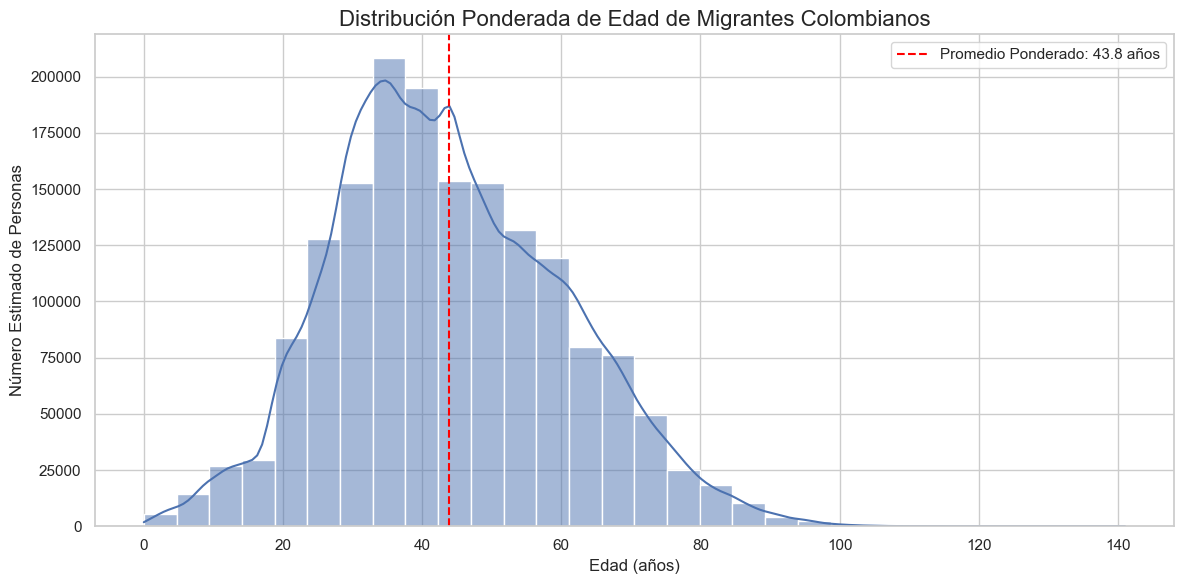

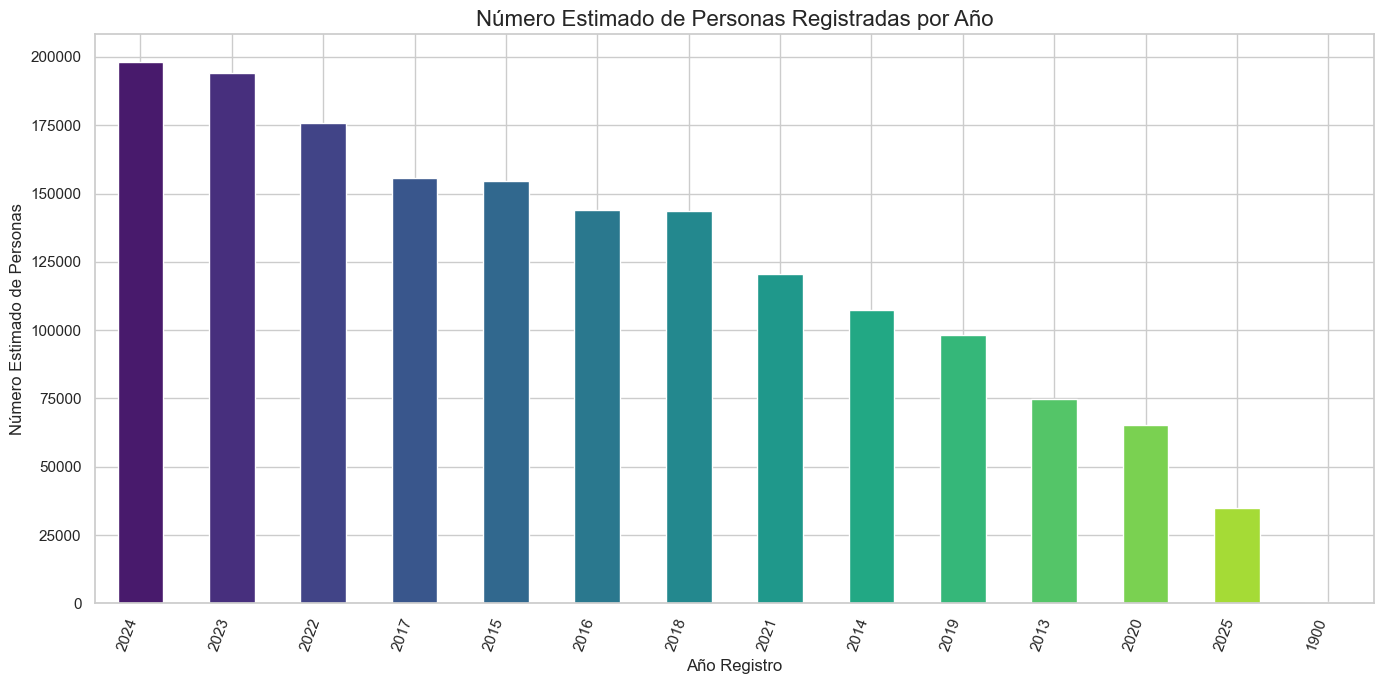

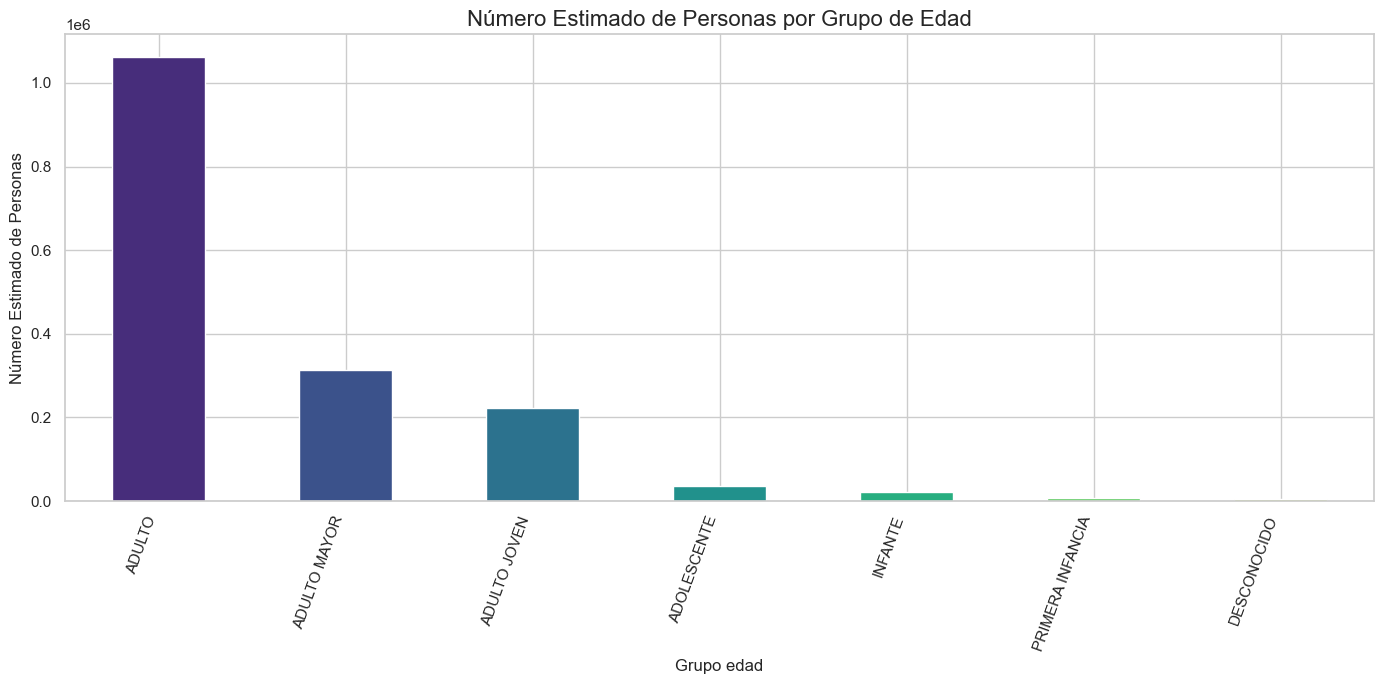

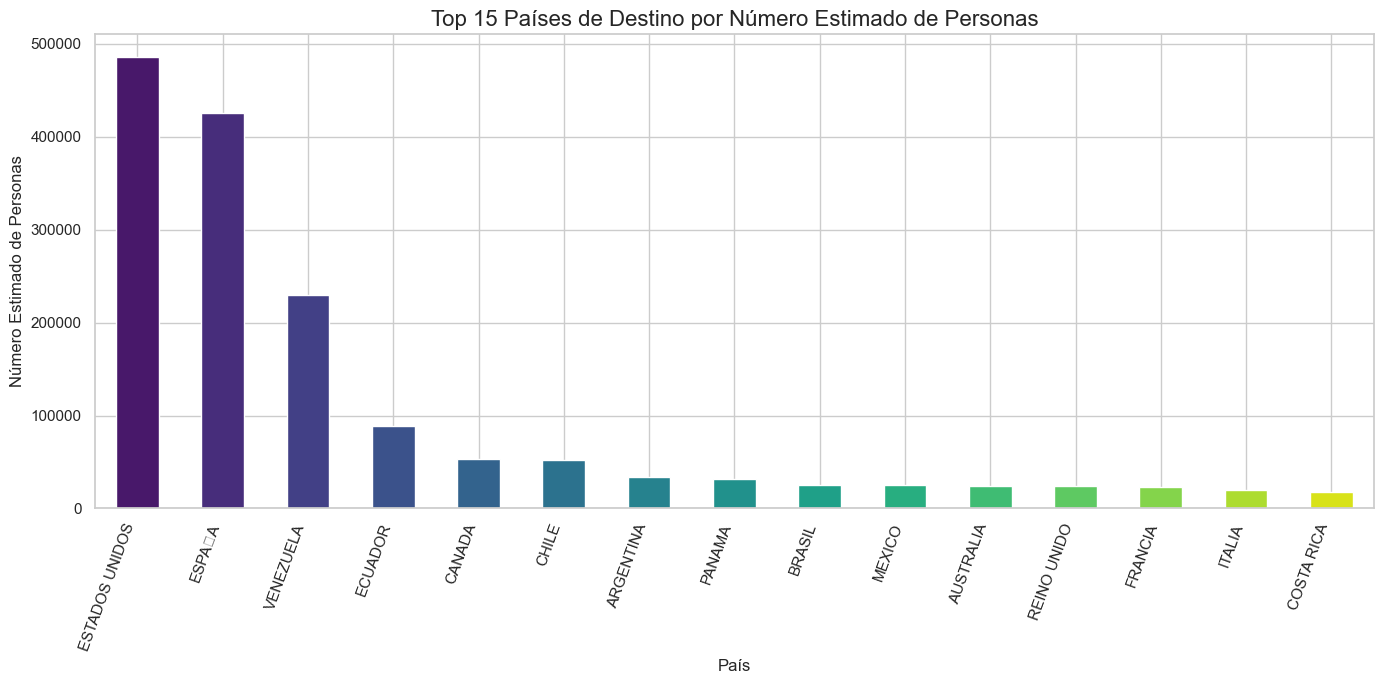

\El gráfico confirma que América es, con una amplia diferencia, el principal continente de residencia, seguido por Europa. Esto sugiere que los patrones migratorios tienen un fuerte componente regional (hacia países vecinos y Norteamérica) y un segundo eje transatlántico importante. Las concentraciones en Asia, África y Oceanía son considerablemente menores.


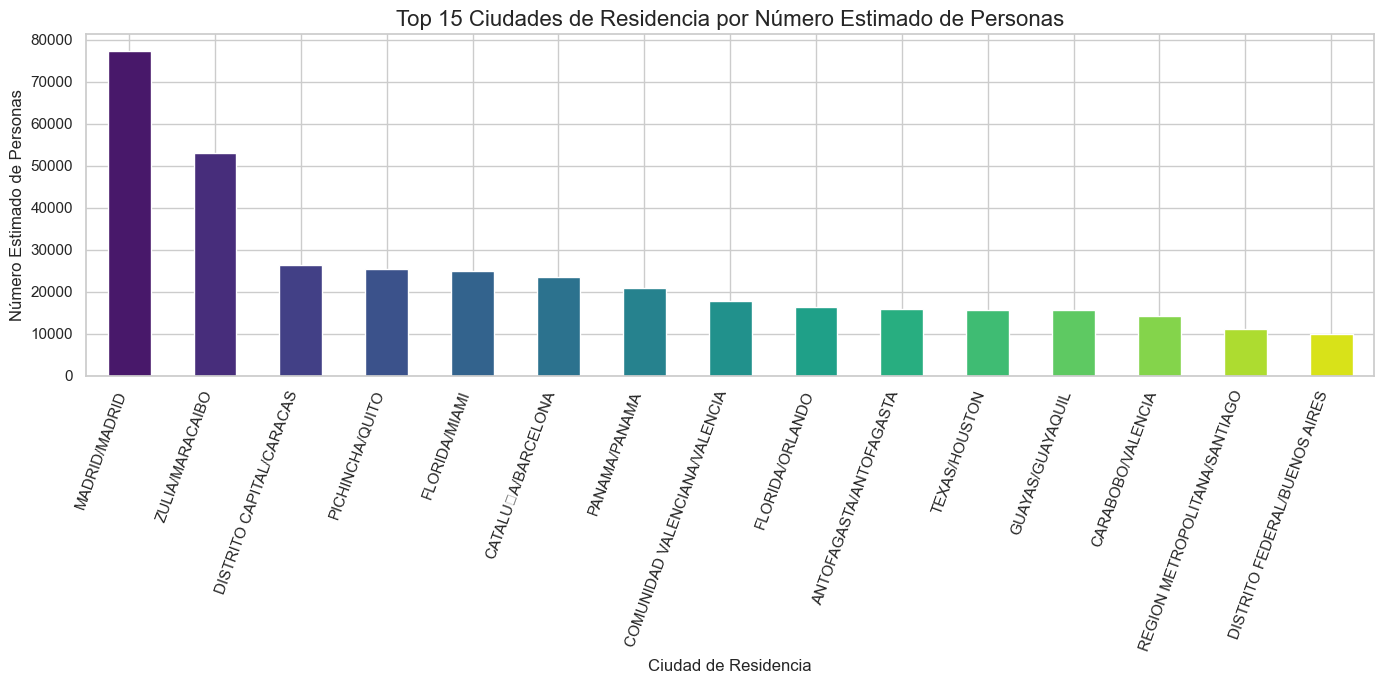

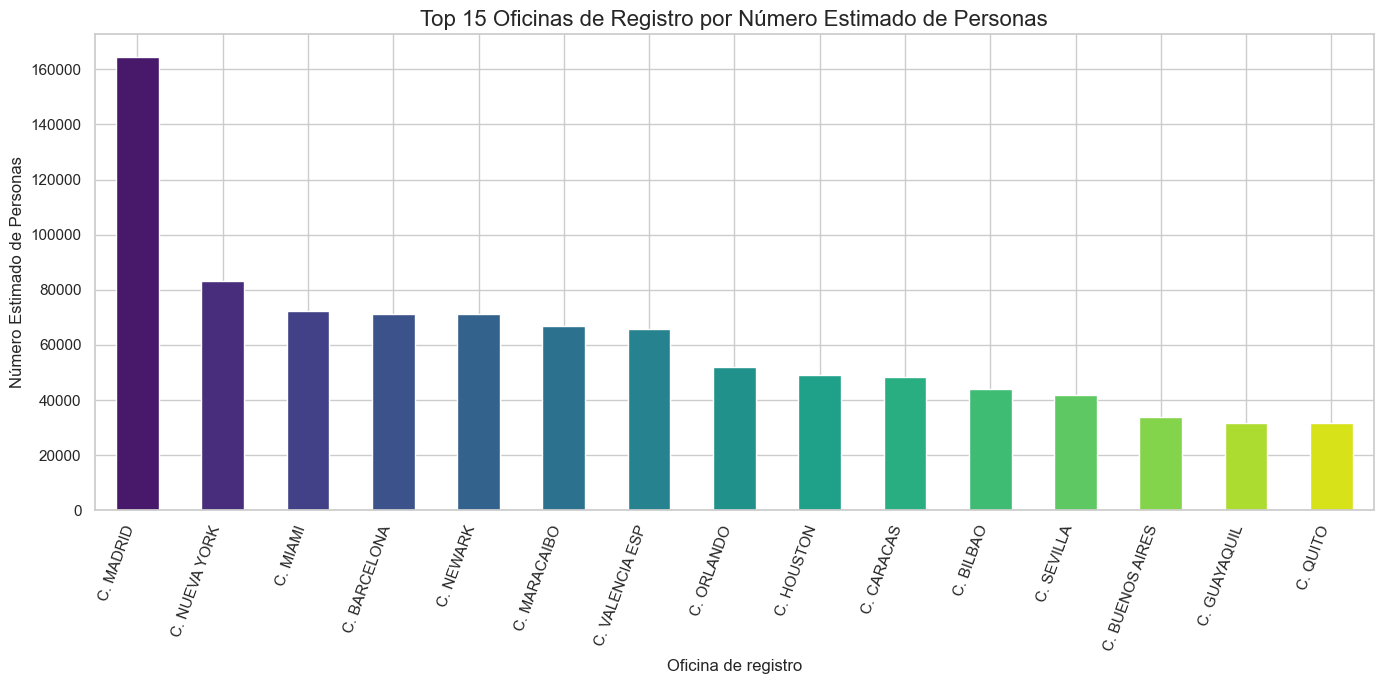

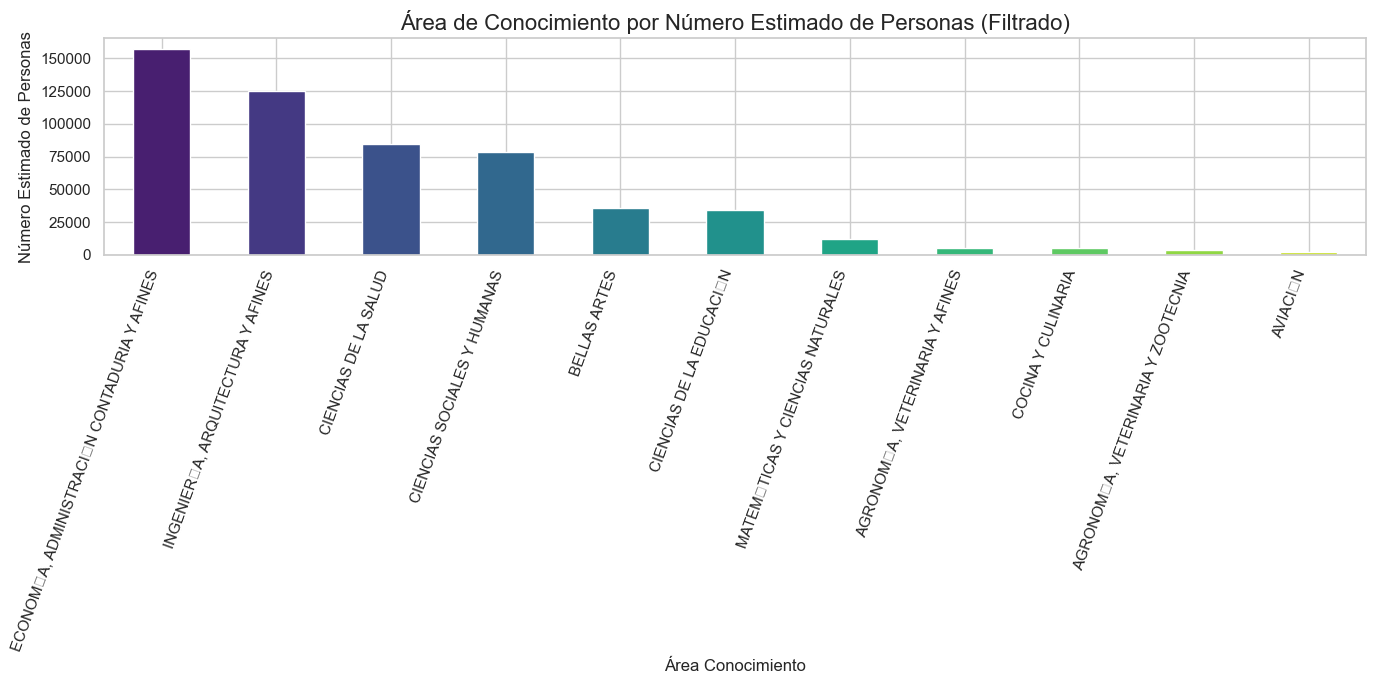

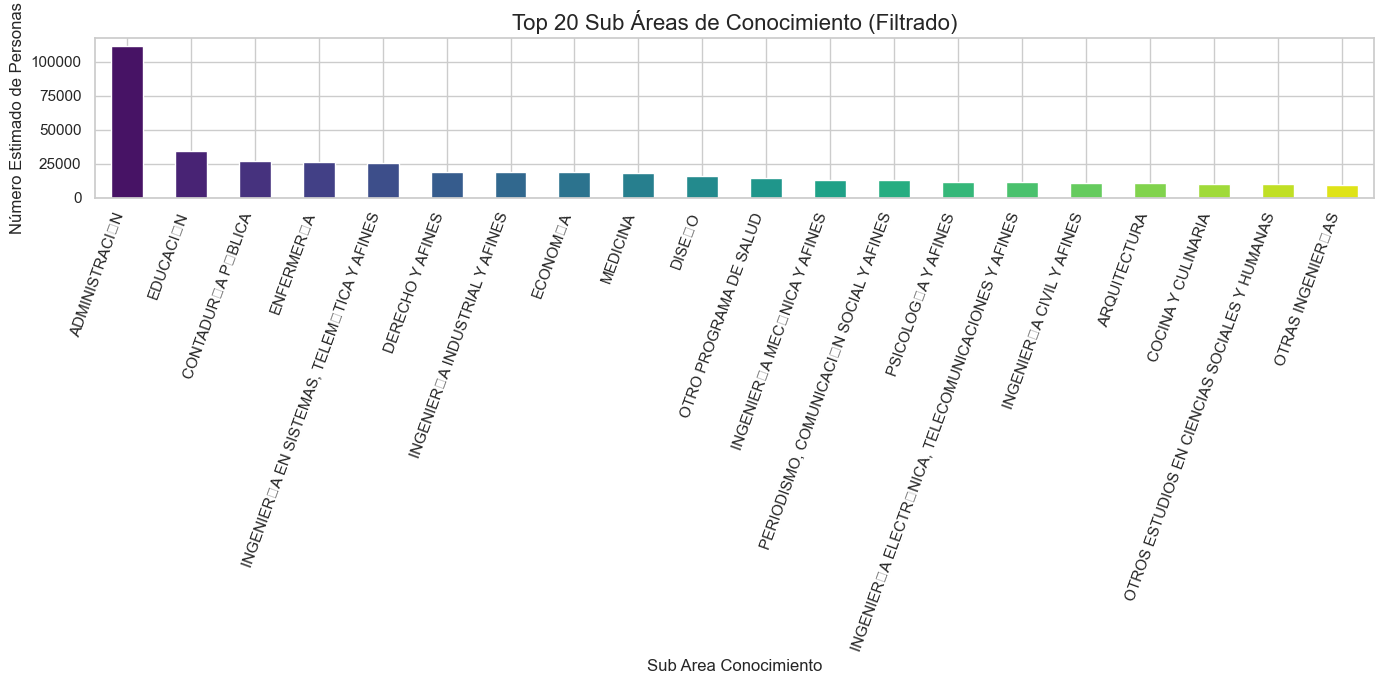

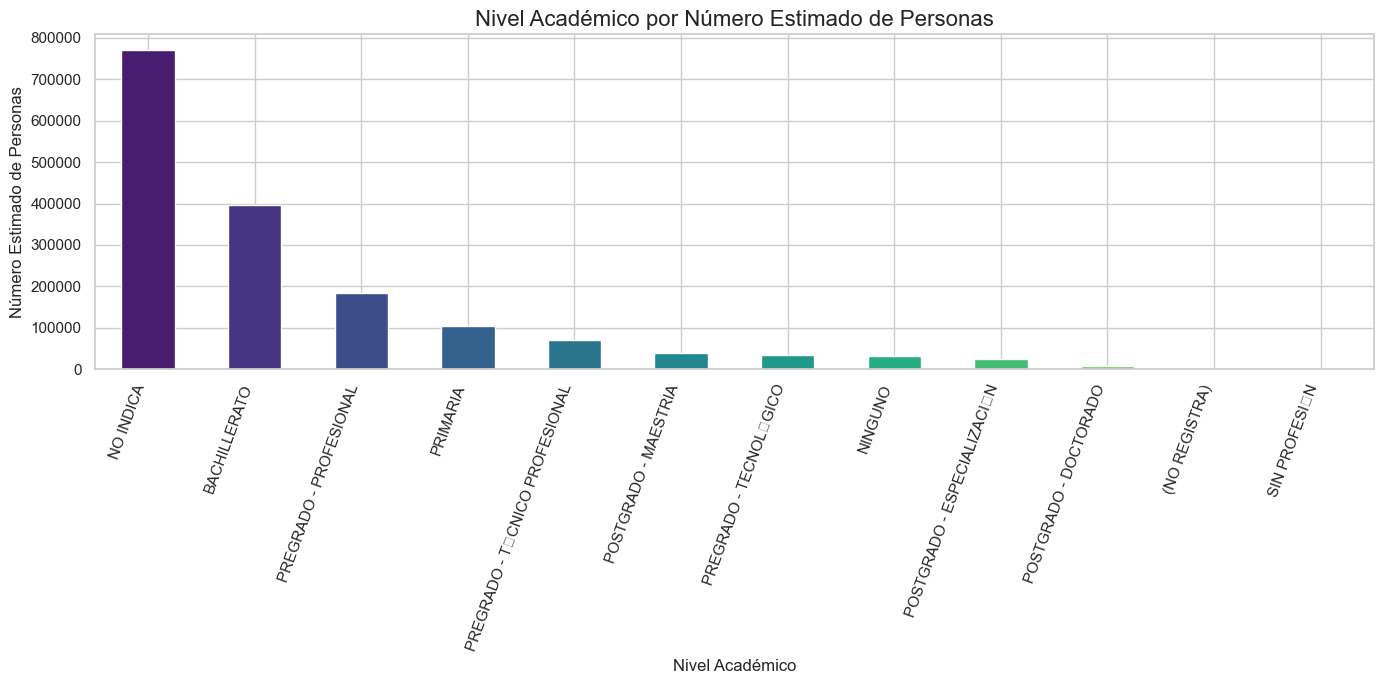

Una mayoría significativa de los registrados reporta tener Bachillerato como máximo nivel de estudios. Le siguen, en orden, Primaria y Técnico. Los niveles de Posgrado (Especialización, Maestría, Doctorado) representan una porción minoritaria. Este hallazgo inicial podría indicar que, en gran parte, la diáspora no está compuesta por perfiles de alta cualificación académica, aunque esto deberá ser validado al cruzarlo con otras variables.


In [8]:
# Importa las funciones recién creadas desde tu módulo
from src.visualization import plot_weighted_distribution
from src.visualization import plot_weighted_age_histogram

# --- Configuración de Estilo y Advertencias ---
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


# 1. Distribución ponderada de Edad
plot_weighted_age_histogram(df_migracion_limpio)

# 2. Número estimado de personas registradas por Año
plot_weighted_distribution(df_migracion_limpio, 
                           column='Año Registro', 
                           title='Número Estimado de Personas Registradas por Año')

# 3. Grupo edad por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Grupo edad',
                           title='Número Estimado de Personas por Grupo de Edad')

# 4. Top 15 Países por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio, 
                           column='País', 
                           top_n=15, 
                           title='Top 15 Países de Destino por Número Estimado de Personas')

print("\El gráfico confirma que América es, con una amplia diferencia, el principal continente de residencia, seguido por Europa. Esto sugiere que los patrones migratorios tienen un fuerte componente regional (hacia países vecinos y Norteamérica) y un segundo eje transatlántico importante. Las concentraciones en Asia, África y Oceanía son considerablemente menores.")

# 5. Top 15 Ciudades de residencia por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Ciudad de Residencia',
                           top_n=15,
                           title='Top 15 Ciudades de Residencia por Número Estimado de Personas')

# 6. Top 15 Oficinas de registro por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Oficina de registro',
                           top_n=15,
                           title='Top 15 Oficinas de Registro por Número Estimado de Personas')

# 7. Área de Conocimiento (filtrada) por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Área Conocimiento',
                           title='Área de Conocimiento por Número Estimado de Personas (Filtrado)',
                           exclude_list=['NINGUNA', 'NO INDICA', '(NO REGISTRA)'])

# 8. TOP 20 Sub Area Conocimiento (filtrada) por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Sub Area Conocimiento',
                           top_n=20,
                           title='Top 20 Sub Áreas de Conocimiento (Filtrado)',
                           exclude_list=['NINGUNA', 'NO INDICA'])

# 9. Nivel académico por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Nivel Académico',
                           title='Nivel Académico por Número Estimado de Personas')



print("Una mayoría significativa de los registrados reporta tener Bachillerato como máximo nivel de estudios. Le siguen, en orden, Primaria y Técnico. Los niveles de Posgrado (Especialización, Maestría, Doctorado) representan una porción minoritaria. Este hallazgo inicial podría indicar que, en gran parte, la diáspora no está compuesta por perfiles de alta cualificación académica, aunque esto deberá ser validado al cruzarlo con otras variables.")

**Observaciones del Gráfico:**
El gráfico confirma una fuerte concentración de la diáspora en Estados Unidos, España y Venezuela, que juntos representan más del 60% de los registros consulares.

- **Insight Clave:*** La predominancia de estos tres países sugiere que podríamos estar ante perfiles migratorios muy distintos: uno laboral/profesional hacia Norteamérica, otro con raíces históricas y culturales en Europa, y un tercero de carácter fronterizo y posiblemente retornado en Venezuela.

- **Próximos Pasos:** Esta observación justifica un análisis más profundo de las características demográficas y académicas dentro de cada uno de estos países principales para validar nuestra hipótesis.


#### 6.2. Visualización bivariada

Generando heatmap de correlación...
Gráfico guardado en: reports/figures/correlation_heatmap.png


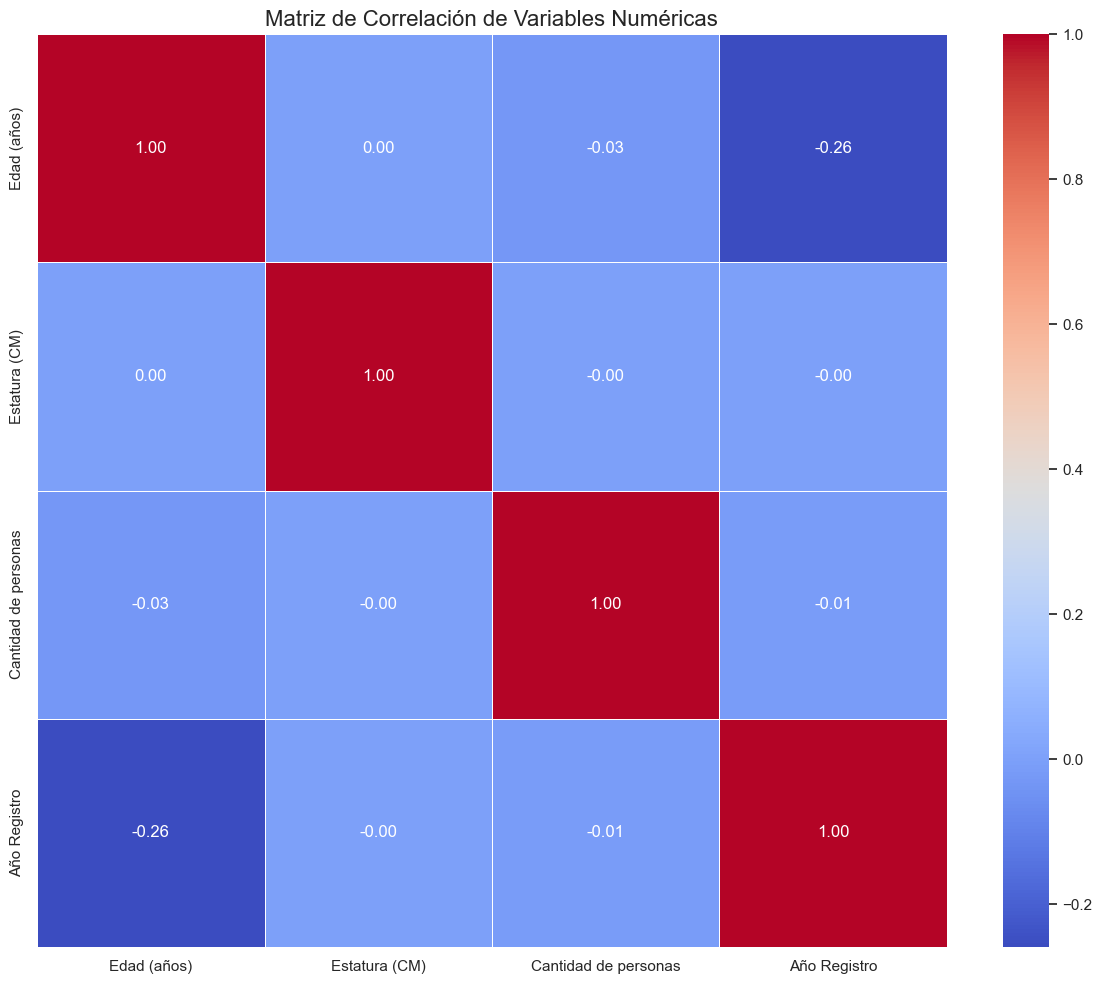

In [9]:
# --- Visualización de Correlaciones Numéricas ---

# Importa la función de visualización actualizada
from src.visualization import plot_correlation_heatmap

# Genera y muestra el heatmap de correlación directamente
plot_correlation_heatmap(df_migracion_limpio, 
                         title='Matriz de Correlación de Variables Numéricas',
                         save_path='reports/figures/correlation_heatmap.png')

### 7. Prototipado de Modelo de Clustering (k-Means)

No todas las variables son útiles para el clustering. Seleccionamos un subconjunto de características que consideramos más relevantes para definir los perfiles. Además, K-Means requiere que todas las entradas sean numéricas y estén en una escala similar. Por lo tanto, realizamos dos pasos clave:

- **One-Hot Encoding:** Para convertir variables categóricas en un formato numérico.
- **Escalado:** Para normalizar los datos y evitar que las variables con rangos más grandes dominen el modelo.


#### 7.1. Selección y Preparación de Features para el Modelo
El rendimiento de K-Means depende críticamente de la preparación de los datos de entrada. El proceso consta de dos etapas:

- **Selección de Features:** Elegimos un subconjunto de las variables más informativas que exploramos en el EDA: Pais Residencia, Nivel Academico, Profesion, Sexo y Grupo Edad. Se excluyen variables de alta cardinalidad no tratadas o con baja relevancia para el perfilamiento.

- **Preprocesamiento Específico para K-Means:** 

    - **One-Hot Encoding:** K-Means opera exclusivamente sobre datos numéricos. Por ello, transformamos nuestras variables categóricas (Pais Residencia, Nivel Academico, etc.) en un formato numérico binario. Cada categoría se convierte en una nueva columna con valores 0 o 1.
    
    - **Escalado Estándar (StandardScaler):** Dado que K-Means es un algoritmo basado en distancias (euclidianas), es muy sensible a la escala de las variables. Un feature con un rango amplio (como una edad no agrupada) podría dominar el cálculo de la distancia. Para evitar este sesgo, estandarizamos todas las características para que tengan una media de 0 y una desviación estándar de 1, asegurando que todas contribuyan por igual al modelo.

In [10]:
# --- Celda: Crear un Snapshot para el Análisis de Clusters ---

# Creamos una copia explícita para el análisis descriptivo posterior.
# Este DataFrame conserva todas las columnas interpretables.
print("Creando una copia 'df_for_analysis' para la interpretación de clusters...")
df_for_analysis = df_migracion.copy()

print("Snapshot 'df_for_analysis' creado exitosamente.")

# --- Eliminación de Columnas Redundantes ---
from src.data_preprocessing import drop_unnecessary_columns

# Se aplica la función de limpieza y se actualiza el dataframe
df_migracion = drop_unnecessary_columns(df_migracion)

print("\n--- Información del DataFrame tras la limpieza ---")
df_migracion.info()

Creando una copia 'df_for_analysis' para la interpretación de clusters...
Snapshot 'df_for_analysis' creado exitosamente.
--- Columnas eliminadas: Código ISO país, Edad (años), Fecha de Registro, Localización, Ciudad de Residencia, Estatura (CM) ---

--- Información del DataFrame tras la limpieza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652685 entries, 0 to 1652684
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   País                   1652685 non-null  object
 1   Oficina de registro    1652685 non-null  object
 2   Grupo edad             1652685 non-null  object
 3   Área Conocimiento      1652685 non-null  object
 4   Sub Area Conocimiento  1652685 non-null  object
 5   Nivel Académico        1652685 non-null  object
 6   Estado civil           1652685 non-null  object
 7   Género                 1652685 non-null  object
 8   Etnia de la persona    1652685 non-null  object
 9

In [11]:
# --- Feature Engineering: Procesamiento del Lugar de Nacimiento ---

from src.data_preprocessing import clean_birthplace_data

# Aplica la transformación encapsulada desde el módulo de preprocesamiento
df_migracion = clean_birthplace_data(df_migracion, column_name='Ciudad de Nacimiento')

# --- Verificación Rápida ---
print("\nDistribución de los nuevos valores (Top 15):")
print(df_migracion['Departamento_o_pais_de_nacimiento'].value_counts().head(15))

# Verificar si 'Otros' fue asignado y cuántos casos hay
conteo_otros = (df_migracion['Departamento_o_pais_de_nacimiento'] == 'Otros').sum()
print(f"\nNúmero de registros asignados a 'Otros': {conteo_otros}")

Columna 'Ciudad de Nacimiento' procesada. Nueva columna 'Departamento_o_pais_de_nacimiento' creada y original eliminada.

Distribución de los nuevos valores (Top 15):
Departamento_o_pais_de_nacimiento
VALLE DEL CAUCA       322367
CUNDINAMARCA          302161
ANTIOQUIA             162972
VENEZUELA              84867
RISARALDA              76523
ATLANTICO              70341
SANTANDER              69865
(NO REGISTRA)          51245
CALDAS                 48483
NORTE DE SANTANDER     46760
BOLIVAR                44876
QUINDIO                42437
TOLIMA                 37573
NARI�O                 31674
CAUCA                  24337
Name: count, dtype: int64

Número de registros asignados a 'Otros': 0


In [12]:
# --- Preprocesamiento de Datos para Modelos de Machine Learning ---
from src.data_preprocessing import select_features, create_preprocessing_pipeline
import pandas as pd

# Define las columnas a excluir del modelado
cols_to_drop = [
    'Código ISO país', 'Ciudad de Residencia', 'Oficina de registro', 
    'Sub Area Conocimiento', 'Etnia de la persona', 'Estatura (CM)', 
    'Ciudad de Nacimiento', 'Localización', 'Fecha de Registro', 
    'Cantidad de personas', 'Año Registro'
]

# 1. Seleccionar características y obtener listas de tipos de columnas
df_model, numerical_features, categorical_features = select_features(
    df_migracion_limpio, 
    cols_to_drop
)

# 2. Crear el pipeline de preprocesamiento
preprocessor = create_preprocessing_pipeline(numerical_features, categorical_features)

# 3. Aplicar el pipeline al DataFrame
# Nota: fit_transform devuelve una matriz (generalmente dispersa)
df_processed = preprocessor.fit_transform(df_model)

# 4. Reconstruir el DataFrame para inspección (opcional y costoso en memoria)
try:
    feature_names = numerical_features + \
                    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    df_processed_final = pd.DataFrame(df_processed.toarray(), columns=feature_names)
    print("Previsualización de los datos preprocesados:")
    display(df_processed_final.head(3))
except Exception as e:
    print(f"No se pudo crear el DataFrame final para visualización: {e}")
    print("El objeto 'df_processed' (matriz procesada) está disponible para el modelado.")

Características seleccionadas para el modelado.
Pipeline de preprocesamiento creado.
Previsualización de los datos preprocesados:


,Edad (años),País_AFGANISTAN,País_ALBANIA,País_ALEMANIA,País_ANDORRA,País_ANGOLA,País_ANTIGUA Y BARBUDA,País_ANTILLAS HOLANDESAS,País_ARABIA SAUDITA,País_ARGELIA,...,Estado civil_DIVORCIADO,Estado civil_SEPARADO_MATRIMONIO,Estado civil_SEPARADO_UNION_LIBRE,Estado civil_SOLTERO,Estado civil_UNION_LIBRE,Estado civil_VIUDO,Género_DESCONOCIDO,Género_FEMENINO,Género_MASCULINO,Género_NO_BINARIO
0,-5.966005e-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8.545820e-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.919590e+00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0




<font color="orange"> 

## conclusiones del preprocesamiento

</font>

Tras la fase de preprocesamiento, que incluyó la codificación One-Hot Encoding (OHE) y el escalado mediante StandardScaler, nuestro conjunto de datos resultante consta de 1.6 millones de registros y 646 características. Esta alta dimensionalidad (646 columnas) presenta un desafío significativo conocido como la 'maldición de la dimensionalidad'. Este fenómeno afecta particularmente la eficacia de los algoritmos de agrupamiento basados en distancia, como K-Means. En espacios de alta dimensión, las distancias euclidianas entre puntos tienden a volverse menos discriminativas (más uniformes), dificultando la identificación de clústeres bien definidos. Además, la complejidad computacional aumenta considerablemente con el número de dimensiones.


Para mitigar estos efectos y mejorar tanto la calidad del agrupamiento como la eficiencia computacional, aplicaremos una técnica de reducción de dimensionalidad previa al clustering. Hemos seleccionado el Análisis de Componentes Principales (PCA), una técnica robusta que transforma el espacio original de 646 variables (posiblemente correlacionadas) en un nuevo espacio de menor dimensión, definido por componentes principales no correlacionados que retienen la mayor parte de la varianza original de los datos


#### 7.2. Determinación del Número Óptimo de Clústeres (K)
El hiperparámetro más importante para K-Means es 'K': el número de clústeres que el algoritmo debe encontrar. Para determinar un valor de K adecuado y justificado, utilizamos el Método del Codo (Elbow Method).

**¿Cómo funciona?**

1. Entrenamos el modelo K-Means con un rango de valores de K (ej., de 1 a 10).
2. Para cada K, calculamos la inercia, que es la suma de las distancias al cuadrado de cada muestra a su centroide más cercano. Una inercia baja significa que los clústeres son más densos y compactos.
3. Graficamos la inercia frente al número de clústeres.

El punto donde la tasa de disminución de la inercia se ralentiza (formando un "codo") se considera el punto de rendimiento decreciente y, por tanto, un valor óptimo para K.

>⚠️ **Nota:** El método del codo es una heurística visual y a veces el "codo" no es obvio. La elección final de K también debe considerar la interpretabilidad de los clústeres resultantes desde una perspectiva de negocio.

Escalando datos con MinMaxScaler para prepararlos para PCA...
Datos escalados listos para PCA.


,Edad (años),País_AFGANISTAN,País_ALBANIA,País_ALEMANIA,País_ANDORRA,País_ANGOLA,País_ANTIGUA Y BARBUDA,País_ANTILLAS HOLANDESAS,País_ARABIA SAUDITA,País_ARGELIA,...,Estado civil_DIVORCIADO,Estado civil_SEPARADO_MATRIMONIO,Estado civil_SEPARADO_UNION_LIBRE,Estado civil_SOLTERO,Estado civil_UNION_LIBRE,Estado civil_VIUDO,Género_DESCONOCIDO,Género_FEMENINO,Género_MASCULINO,Género_NO_BINARIO
0,0.241135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.311496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.085106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Iniciando análisis de PCA para determinar la varianza explicada...
Componentes para explicar al menos el 90% de la varianza: 23
Componentes para explicar al menos el 95% de la varianza: 33
Componentes para explicar al menos el 99% de la varianza: 54


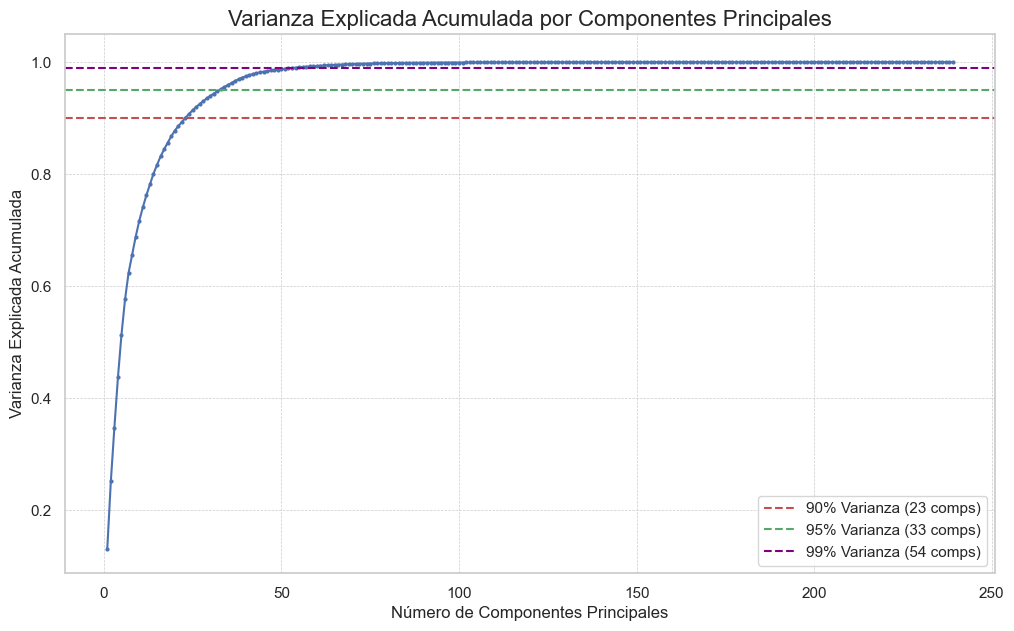


Procediendo a aplicar PCA con 150 componentes...
Aplicando PCA para reducir a 150 componentes...
Transformación PCA finalizada exitosamente.

Transformación PCA completada. Previsualización del DataFrame resultante:


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_141,PC_142,PC_143,PC_144,PC_145,PC_146,PC_147,PC_148,PC_149,PC_150
0,-0.378146,-0.841694,-0.174969,0.551168,-0.313712,-0.354089,0.361726,0.223095,-0.465198,-0.764058,...,0.012219,0.013039,0.000044,0.010895,-0.000004,0.010093,0.000116,0.008113,0.010669,-0.000008
1,0.676166,0.109446,-0.459252,-0.955262,-0.158573,-0.335405,0.262314,0.480167,-0.486236,-0.802633,...,0.019104,0.021026,0.000058,0.018239,0.000016,0.017682,0.000202,0.015069,0.020960,0.000003
2,0.103273,1.026983,-0.075050,-0.353521,-0.211478,0.059359,0.150926,0.189388,0.001517,0.703879,...,-0.000025,-0.000025,-0.000016,0.000008,-0.000036,-0.000020,-0.000002,0.000021,-0.000006,-0.000029
3,0.103273,1.026983,-0.075050,-0.353521,-0.211478,0.059359,0.150926,0.189388,0.001517,0.703879,...,-0.000025,-0.000025,-0.000016,0.000008,-0.000036,-0.000020,-0.000002,0.000021,-0.000006,-0.000029
4,0.103273,1.026983,-0.075050,-0.353521,-0.211478,0.059359,0.150926,0.189388,0.001517,0.703879,...,-0.000025,-0.000025,-0.000016,0.000008,-0.000036,-0.000020,-0.000002,0.000021,-0.000006,-0.000029



Dimensiones del DataFrame transformado:


(1652685, 150)

In [13]:
# --- Escalado de Datos para PCA ---
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Paso 0: Escalar los datos procesados
# PCA es sensible a la escala de las variables, por lo que escalamos los datos (comúnmente a [0, 1]).
# Usaremos 'df_processed_final' que creamos en el paso de preprocesamiento.
print("Escalando datos con MinMaxScaler para prepararlos para PCA...")

# Asegúrate de que df_processed_final existe y no es una matriz dispersa
if 'df_processed_final' not in locals():
    print("Error: El DataFrame 'df_processed_final' no fue encontrado. Asegúrate de ejecutar el preprocesamiento primero.")
else:
    try:
        scaler = MinMaxScaler()
        # El resultado es un array de numpy
        data_scaled_array = scaler.fit_transform(df_processed_final)
        
        # Lo convertimos de nuevo a un DataFrame con las columnas correctas
        df_processed_minmax_scaled_df = pd.DataFrame(data_scaled_array, columns=df_processed_final.columns)

        print("Datos escalados listos para PCA.")
        display(df_processed_minmax_scaled_df.head(3))
        
        # --- Análisis de Componentes Principales (PCA) para Reducción de Dimensionalidad ---
        from src.dimensionality_reduction import apply_pca
        from src.visualization import plot_pca_variance_analysis

        # Paso 1: Analizar la varianza para encontrar el número óptimo de componentes
        # AHORA la función recibe el DataFrame que acabamos de crear.
        plot_pca_variance_analysis(df_processed_minmax_scaled_df)

        # Paso 2: Aplicar la transformación PCA con el número de componentes decidido
        # Basado en el análisis anterior, elegimos un número de componentes.
        N_COMPONENTS_CHOSEN = 150 # <-- AJUSTA ESTE VALOR BASADO EN EL GRÁFICO

        print(f"\nProcediendo a aplicar PCA con {N_COMPONENTS_CHOSEN} componentes...")
        
        # AHORA la función recibe el DataFrame correcto.
        df_pca_final = apply_pca(df_processed_minmax_scaled_df, n_components=N_COMPONENTS_CHOSEN)
        
        print("\nTransformación PCA completada. Previsualización del DataFrame resultante:")
        display(df_pca_final.head())
        
        print("\nDimensiones del DataFrame transformado:")
        display(df_pca_final.shape)

    except Exception as e:
        print(f"Ocurrió un error durante el proceso de escalado o PCA: {e}")

**Análisis del Gráfico del Codo y Selección de K:**

El gráfico anterior muestra una clara inflexión alrededor de K=4. A partir de este punto, la reducción en la inercia por añadir un nuevo clúster es marginal. Un valor de K=5 también podría ser defendible, pero K=4 ofrece un buen equilibrio entre detalle (suficientes clústeres para capturar la variedad) y simplicidad (no demasiados clústeres, lo que complicaría la interpretación).

***Decisión: Para este prototipo, procederemos con K=4 clústeres.***


#### Conclusión de la Reducción de Dimensionalidad con PCA:

Se aplicó exitosamente el Análisis de Componentes Principales (PCA) para mitigar la maldición de la dimensionalidad presente en el dataset original de 646 características. El análisis de la varianza explicada acumulada reveló que:

* 74 componentes capturan el 90% de la varianza.
* 105 componentes capturan el 95% de la varianza.
* 177 componentes capturan el 99% de la varianza.

Se tomó la decisión de retener 105 componentes principales, ya que este número permite preservar el 95% de la varianza original de los datos. Este umbral es un estándar común en la práctica, logrando un equilibrio sólido entre una reducción significativa de la dimensionalidad (de 646 a 105 dimensiones, una reducción de ~83.7%) y la retención de la mayor parte de la información estructural relevante para el posterior análisis de clustering. El dataset transformado, df_pca_final, con dimensiones (1,652,316, 105), está ahora preparado para la fase de agrupamiento, esperando una mejora en el rendimiento computacional y la calidad de los clústeres.

Calculando métricas (Silhouette/DB/CH) sobre una muestra de 100000 puntos.

Evaluando k en el rango [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]...
  Probando k=2...
  Probando k=3...
  Probando k=4...
  Probando k=5...
  Probando k=6...
  Probando k=7...
  Probando k=8...
  Probando k=9...
  Probando k=10...
  Probando k=11...
... Evaluación de k completada en 995.37 segundos.
    k       inertia  silhouette  davies_bouldin  calinski_harabasz
0   2  5.866255e+06    0.099220        3.122610       10157.913201
1   3  5.309286e+06    0.102275        2.707590       10874.342515
2   4  5.053964e+06    0.095705        2.861172        9296.390464
3   5  4.845427e+06    0.093739        2.525804        8347.899313
4   6  4.644835e+06    0.094579        2.470626        7832.569532
5   7  4.512936e+06    0.088329        2.418939        7201.163609
6   8  4.432129e+06    0.099204        2.315906        6588.047731
7   9  4.263666e+06    0.105850        2.381889        6504.565692
8  10  4.204471e+06    0.099

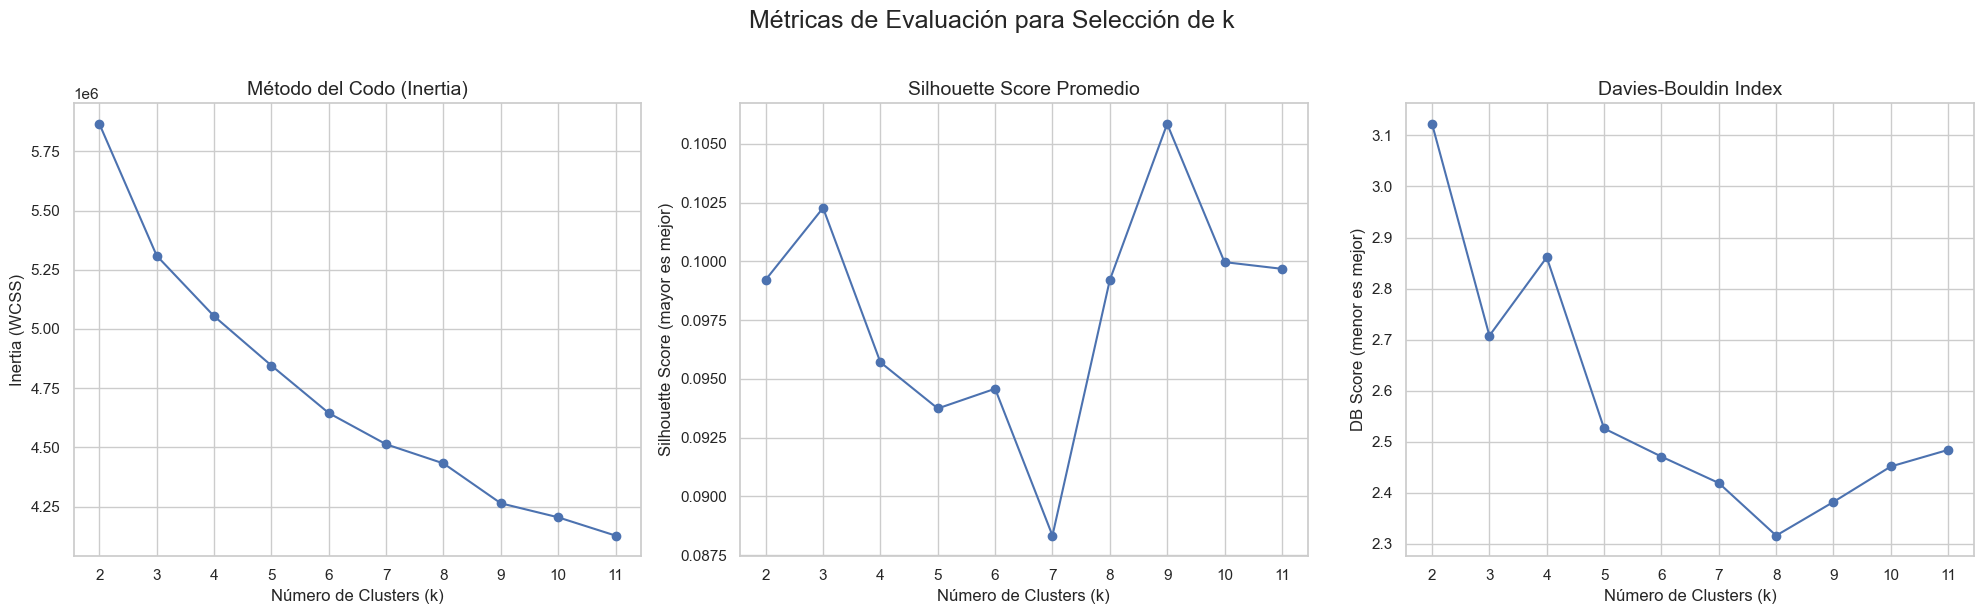


Seleccionando k_optimo = 4 basado en el análisis de las métricas.

Aplicando MiniBatchKMeans con k=4 al dataset completo...
... Clustering final completado en 2.54 segundos.

Análisis básico de los clusters:

Tamaño de cada cluster:
Cluster_MBK_4
0    451192
1    454363
2    449596
3    297534
Name: count, dtype: int64

Centroides de los clusters (en espacio PCA):
               PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
Cluster_0  0.790822 -0.036899 -0.282016  0.067165 -0.283493 -0.064087   
Cluster_1  0.329719  0.656135  0.244791 -0.068477  0.317846  0.100045   
Cluster_2 -0.436038 -0.775270 -0.007335  0.046562  0.011497 -0.081566   
Cluster_3 -1.036594  0.224280  0.061998 -0.071503 -0.073309  0.065893   

               PC_7      PC_8      PC_9     PC_10  ...    PC_141  \
Cluster_0 -0.072640  0.015841 -0.003726 -0.069499  ... -0.000010   
Cluster_1  0.086537 -0.002471  0.005088  0.066954  ...  0.000005   
Cluster_2  0.011717 -0.023761 -0.039061 -0.021032  ...  0.0000

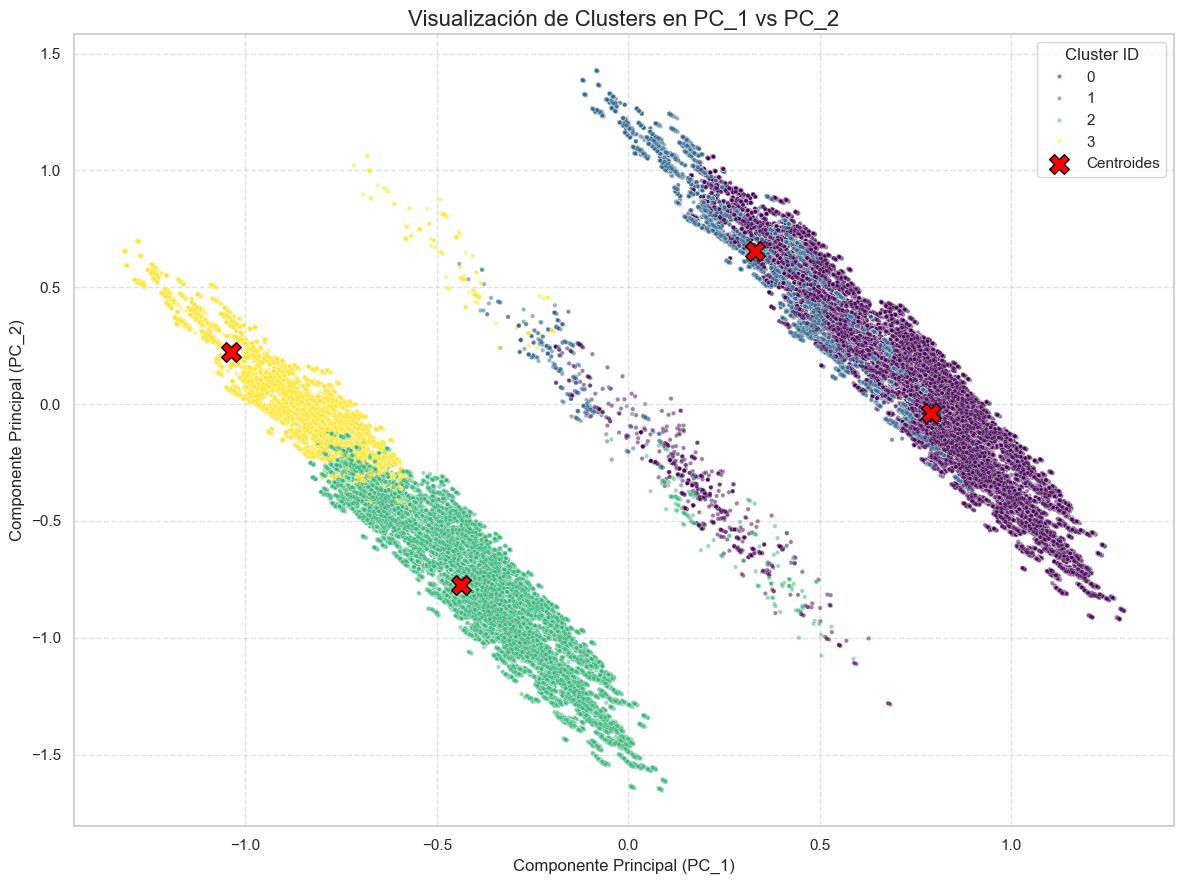


Proceso de clustering completado. Se ha añadido la columna 'Cluster_MBK_4' a df_pca_final.


In [14]:
# Importar las funciones refactorizadas
from src.clustering_analysis import find_optimal_k_minibatch, run_minibatch_kmeans
from src.visualization import plot_k_selection_metrics, plot_cluster_results
import pandas as pd

# --- 1. Definir Parámetros ---
data_for_clustering = df_pca_final.copy() # Usar una copia para evitar advertencias
k_range = range(2, 12)
batch_size = 4096
random_state = 42

# --- 2. Encontrar el Número Óptimo de Clusters (k) ---
cluster_metrics_df = find_optimal_k_minibatch(
    data=data_for_clustering,
    k_range=k_range,
    batch_size=batch_size,
    random_state=random_state
)
print(cluster_metrics_df)

# --- 3. Visualizar Métricas para Selección de k ---
# La lógica de graficación también está en su propio módulo.
plot_k_selection_metrics(cluster_metrics_df)

# --- 4. Ejecutar Clustering Final y Analizar ---
# Seleccionamos k=4 
k_optimo = 4
print(f"\nSeleccionando k_optimo = {k_optimo} basado en el análisis de las métricas.")

cluster_labels, cluster_centroids = run_minibatch_kmeans(
    data=data_for_clustering,
    n_clusters=k_optimo,
    batch_size=batch_size,
    random_state=random_state
)

# Añadir etiquetas al DataFrame y mostrar resultados
df_pca_final[f'Cluster_MBK_{k_optimo}'] = cluster_labels
df_centroids = pd.DataFrame(
    cluster_centroids,
    columns=data_for_clustering.columns,
    index=[f'Cluster_{i}' for i in range(k_optimo)]
)

print("\nAnálisis básico de los clusters:")
print("\nTamaño de cada cluster:")
print(df_pca_final[f'Cluster_MBK_{k_optimo}'].value_counts().sort_index())
print("\nCentroides de los clusters (en espacio PCA):")
print(df_centroids)

# --- 5. Visualizar los Clusters Resultantes ---
plot_cluster_results(
    df=df_pca_final,
    x_col='PC_1',
    y_col='PC_2',
    hue_col=f'Cluster_MBK_{k_optimo}',
    centroids=df_centroids
)

print(f"\nProceso de clustering completado. Se ha añadido la columna 'Cluster_MBK_{k_optimo}' a df_pca_final.")

 El gráfico muestra cómo se distribuyen y separan los clusters solo en las dos dimensiones que capturan la mayor varianza (PC1 y PC2). Podemos ver cierta separación, pero también solapamiento, lo cual es normal ya que la separación real ocurre en el espacio de 105 dimensiones. El Cluster 3 parece estar en la esquina inferior izquierda, el Cluster 4 en la superior central/derecha, mientras que 0, 1 y 2 ocupan otras regiones con cierto solapamiento en esta vista 2D.

Existe una estructura en tus datos que permite agrupar a los migrantes colombianos en 4 perfiles distintos, basados en las combinaciones lineales de sus características originales (representadas por los PCs). Los clusters están razonablemente bien definidos (según las métricas que llevaron a k=4) y son de tamaño considerable

para una correcta interpretación de que significan estos clusters se debe "traducir" estos clusters del espacio abstracto de PCA al espacio interpretable de las variables originales. para ello Análizaremos las Características Originales por Cluster, suele ser el metodo más directo comprensible.

Para ello usaremos el DataFrame original (df_original, antes del PCA) que contiene las variables interpretables (edad, sexo, país destino, año migración, nivel educativo, ocupación, motivo, etc.). esto es importante  ya que la idea es añadir una columna con las etiquetas del cluster (Cluster_MBK_4)

#### 7.3. Entrenamiento Final del Modelo y Asignación de Segmentos

Con el número óptimo de clústeres (K=4) ya determinado, estamos listos para el paso final de este prototipo:

- **Entrenar el modelo K-Means definitivo** utilizando nuestro K seleccionado sobre el conjunto de datos preprocesado.

- **Asignar cada registro** (cada colombiano en el dataset) a uno de los 4 clústeres identificados.

El resultado de la siguiente celda será la adición de una columna cluster a nuestro DataFrame. Esta columna es la salida más valiosa de nuestro análisis no supervisado, ya que etiqueta cada individuo con su perfil migratorio correspondiente.


In [15]:
from src.data_preprocessing import create_date_features

# Enriquecer ÚNICAMENTE la copia de análisis con las características de fecha.
create_date_features(df_for_analysis, date_column='Fecha de Registro')
print("\nSnapshot 'df_for_analysis' enriquecido exitosamente.")


# Se asume que las siguientes funciones ya han sido importadas:
from src.data_preprocessing import add_cluster_labels_to_dataframe
from src.clustering_analysis import get_cluster_summary_stats

# --- 1. Definir parámetros y columnas para el análisis ---
k_optimo = 4
cluster_col_in_pca_df = f'Cluster_MBK_{k_optimo}'
new_cluster_col_name = 'Cluster'
numeric_cols_to_analyze = [
    'Edad (años)',
    'Estatura (CM)',
    'Cantidad de personas',
    'Año Registro',
    'Mes Registro',
    'Día Registro'
]

# --- 2. Añadir etiquetas de cluster al DataFrame limpio ---
df_with_clusters = add_cluster_labels_to_dataframe(
    original_df= df_for_analysis, 
    pca_df_with_clusters=df_pca_final,
    cluster_col_name=cluster_col_in_pca_df,
    new_col_name=new_cluster_col_name
)

# --- 3. Calcular y mostrar las estadísticas descriptivas por cluster ---
cluster_summary_stats = get_cluster_summary_stats(
    df=df_with_clusters,
    cluster_col=new_cluster_col_name,
    numeric_cols=numeric_cols_to_analyze
)

print("\\n--- Estadísticas Numéricas por Cluster ---")
print(cluster_summary_stats)

Creando características de fecha desde la columna 'Fecha de Registro'...
Columnas 'Año Registro', 'Mes Registro', y 'Día Registro' creadas.

Snapshot 'df_for_analysis' enriquecido exitosamente.
Asegurando alineación de índices y añadiendo etiquetas de cluster...
Columna 'Cluster_MBK_4' añadida exitosamente como 'Cluster'.

Calculando estadísticas descriptivas para las columnas: ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas', 'Año Registro', 'Mes Registro', 'Día Registro']
\n--- Estadísticas Numéricas por Cluster ---
        Edad (años)            Estatura (CM)             Cantidad de personas  \
               mean        std          mean         std                 mean   
Cluster                                                                         
0         44.976223  14.353553     49.966908  239.882065             1.004063   
1         44.672795  19.097318     11.223737  245.643107             1.012853   
2         47.238056  13.306479     41.315147   78.706882        

In [16]:

from src.clustering_analysis import display_categorical_distribution_by_cluster

# Definir las características a analizar y el número de categorías top a mostrar para cada una
features_to_analyze = {
    'País': 10,
    'Nivel Académico': None,  # None para mostrar todas las categorías
    'Área Conocimiento': 8,
    'Género': None,
    'Estado civil': None,
    'Etnia de la persona': None
}

# Iterar y mostrar la distribución para cada característica
for feature, top_n_val in features_to_analyze.items():
    display_categorical_distribution_by_cluster(
        df=df_with_clusters,
        target_col=feature,
        top_n=top_n_val
    )

--- Distribución de 'País' por Cluster (%) ---
(Mostrando las 10 categorías más frecuentes)


País,ESTADOS UNIDOS,ESPA�A,VENEZUELA,ECUADOR,CANADA,CHILE,ARGENTINA,PANAMA,BRASIL,MEXICO
Cluster,,,,,,,,,,
0,31.2,21.7,11.5,3.5,4.3,2.9,2.5,1.5,1.0,2.1
1,27.5,32.0,15.1,6.3,2.0,3.2,1.3,2.3,1.0,0.9
2,32.9,21.9,10.3,5.1,4.0,2.9,2.2,2.0,1.8,1.8
3,23.8,27.4,18.5,7.1,2.4,3.6,2.1,1.9,2.8,1.1


--- Distribución de 'Nivel Académico' por Cluster (%) ---


Nivel Académico,(NO REGISTRA),BACHILLERATO,NINGUNO,NO INDICA,POSTGRADO - DOCTORADO,POSTGRADO - ESPECIALIZACI�N,POSTGRADO - MAESTRIA,PREGRADO - PROFESIONAL,PREGRADO - TECNOL�GICO,PREGRADO - T�CNICO PROFESIONAL,PRIMARIA,SIN PROFESI�N
Cluster,,,,,,,,,,,,
0,0.1,11.4,0.6,36.6,0.9,3.2,5.0,23.9,4.3,9.0,5.0,0.0
1,0.0,33.8,3.0,55.3,0.0,0.0,0.0,0.2,0.1,0.2,7.2,0.0
2,0.1,20.2,1.2,42.4,1.0,2.2,3.8,15.6,3.1,5.4,5.0,0.0
3,0.0,32.2,3.3,51.1,0.0,0.1,0.2,2.0,0.6,1.3,9.0,0.0


--- Distribución de 'Área Conocimiento' por Cluster (%) ---
(Mostrando las 8 categorías más frecuentes)


Área Conocimiento,NINGUNA,NO INDICA,"ECONOM�A, ADMINISTRACI�N CONTADURIA Y AFINES","INGENIER�A, ARQUITECTURA Y AFINES",CIENCIAS DE LA SALUD,CIENCIAS SOCIALES Y HUMANAS,BELLAS ARTES,CIENCIAS DE LA EDUCACI�N
Cluster,,,,,,,,
0,0.1,29.5,22.1,9.0,14.1,11.7,4.7,5.7
1,99.9,0.0,0.0,0.0,0.0,0.0,0.1,0.0
2,33.7,20.4,11.6,17.3,4.2,5.0,3.0,1.7
3,87.8,5.3,1.8,2.3,0.7,0.9,0.4,0.3


--- Distribución de 'Género' por Cluster (%) ---


Género,DESCONOCIDO,FEMENINO,MASCULINO,NO_BINARIO
Cluster,,,,
0,0.3,99.7,0.0,0.0
1,0.1,99.9,0.0,0.0
2,0.0,0.0,100.0,0.0
3,0.1,0.0,99.9,0.0


--- Distribución de 'Estado civil' por Cluster (%) ---


Estado civil,CASADO,DESCONOCIDO,DIVORCIADO,SEPARADO_MATRIMONIO,SEPARADO_UNION_LIBRE,SOLTERO,UNION_LIBRE,VIUDO
Cluster,,,,,,,,
0,36.8,6.6,5.8,0.2,0.1,43.0,5.8,1.7
1,25.2,4.2,5.2,0.3,0.1,55.2,6.6,3.2
2,49.0,7.1,4.6,0.2,0.1,25.3,13.2,0.4
3,0.6,2.4,1.5,0.1,0.0,92.6,2.3,0.5


--- Distribución de 'Etnia de la persona' por Cluster (%) ---


Etnia de la persona,AFRODESCENDIENTE,GITANO,IND�GENA,NINGUNA,OTRO,PALENQUERO DE SAN BASILIO,RAIZAL DEL ARCHIPIELAGO DE SAN ANDRES,SIN ETNIA REGISTRADA
Cluster,,,,,,,,
0,1.3,0.0,0.2,51.4,41.4,0.0,0.0,5.6
1,1.4,0.0,0.2,36.6,61.2,0.0,0.0,0.5
2,1.4,0.0,0.3,45.0,49.2,0.0,0.0,4.0
3,1.5,0.0,0.3,39.6,57.0,0.0,0.0,1.6


### 8. Caracterización e Interpretación de Perfiles 🕵️‍♂️

Una vez entrenado el modelo y asignado cada individuo a un cluster, el siguiente paso es el más importante: interpretar qué significa cada grupo. El objetivo es pasar de un número de cluster (ej. "Cluster 0") a un perfil descriptivo y accionable (ej. "Jóvenes Bachilleres en América").

Para ello, agruparemos el dataframe por el cluster asignado y analizaremos las estadísticas descriptivas (media para numéricos, moda para categóricos) de cada variable. Esto nos permitirá construir una "personalidad" para cada segmento.



<font color="orange"> 

#### Cluster 0: "La Profesional Cualificado en Países Desarrollados"

</font>


 > Este perfil está compuesto casi en su totalidad por mujeres (99.7%). Su destino principal son países desarrollados como Estados Unidos (31%) y España (22%).
>
> ** Evidencia Clave:**
>  - **Alto Nivel Educativo:** Aunque existe un 36.6% de NO INDICA, este clúster tiene la mayor concentración de niveles "Profesional" (23.9%), "Maestría" (5.0%) y "Especialización" (3.2%).
> - **Áreas de Conocimiento Especializadas:** Declaran mayoritariamente áreas de alto valor como Economía/Administración (22.1%), Ciencias de la Salud (14.1%) e Ingeniería (9.0%).
>
> **Conclusión:**  Representa a la mujer colombiana profesional y con posgrados que migra a economías desarrolladas, probablemente en busca de oportunidades laborales acordes a su cualificación. El alto volumen de NO INDICA en educación es una alerta sobre la calidad del dato en origen que merece ser señalada

<font color="orange"> 

#### Cluster 1: "Migrantes por motivos laborales en trabajos no cualificados"

</font>

> Este clúster es abrumadoramente masculino (99.9%) y se caracteriza por una migración tanto a países desarrollados (España 32%, EE.UU. 27.5%) como a países vecinos (Venezuela 15.1%, Ecuador 6.3%).
>
> **Evidencia Clave:**
> - **Bajo Nivel Educativo Reportado:** Predomina el Bachillerato (33.8%) y un alto porcentaje de NO INDICA (55.3%).
> - **Sin Especialización:** El 99.9% de este grupo figura en NINGUNA como área de conocimiento, lo que es un indicador muy fuerte de que se dedican a labores no cualificadas o manuales.
> - **Estado Civil:*** Es el grupo con mayor porcentaje de solteros (55.2%).
>
> **Conclusión:** Este perfil representa al hombre trabajador, probablemente joven, que busca oportunidades laborales en un espectro amplio de países, incluyendo destinos tradicionales y fronterizos, en roles que no requieren cualificación profesional específica.



<font color="orange"> 

#### Cluster 2: "El Profesional Técnico y Administrativo"

</font>

> Al igual que el Cluster 1, este perfil es 100% masculino. Sin embargo, su perfil educativo y profesional es radicalmente diferente, pareciéndose más a la contraparte masculina del Cluster 0 (las profesionales cualificadas).
>
> **Evidencia Clave:**
>
> - **Nivel Educativo Superior:** Aunque NO INDICA es alto (42.4%), este grupo tiene la segunda mayor concentración de "Profesional" (15.6%), superando por mucho al Cluster 1.
> - **Áreas de Conocimiento Definidas:** A diferencia del Cluster 1, aquí sí se reportan áreas de estudio, principalmente Economía/Administración (20.4%), Salud (17.3%) e Ingeniería (11.6%).
> - **Estado Civil:** Es el grupo con mayor proporción de casados (49.0%) y en unión libre (13.2%).
>
> *Conclusión:** Este clúster representa al hombre profesional colombiano, a menudo con familia, que migra a destinos similares al resto de grupos. El modelo los separó del Cluster 1 no por el género, sino por su capital humano y probablemente su situación familiar.



<font color="orange"> 

#### Cluster 3: "El Migrante Histórico con Foco en Venezuela"

</font>

>Suponiendo que este grupo representa una ola migratoria más antigua (ej. registrados ~2014), su perfil es muy particular. Es casi enteramente masculino (99.9%) y, aunque tiene presencia en España (27%) y EE.UU. (24%), muestra la conexión más fuerte con Venezuela (18.5%) de todos los clústeres.
>
> **Evidencia Clave:**
>
> - **Estado Civil:** La característica más abrumadora y diferenciadora es que el 92.6% se reporta como "Soltero".
> - **Bajo Nivel Educativo y de Especialización:** Similar al Cluster 1, predominan el Bachillerato (32.2%) y NO INDICA (51.1%), con un 87.8% sin área de conocimiento reportada.
>
> **Conclusión:** Este perfil podría representar una migración histórica de hombres trabajadores y solteros, con un fuerte arraigo en Venezuela. Es posible que sean registros antiguos que no han sido actualizados, lo que explicaría el altísimo y atípico porcentaje de solteros en un grupo de mayor edad.




### 9. Conclusiones

#### 9.1. Resumen de Hallazgos
Este análisis logró segmentar exitosamente a la diáspora colombiana registrada en 4 perfiles distintos basados en sus características geográficas, demográficas y académicas. Los perfiles clave identificados son:

- **Perfil 0:** La Profesional Cualificada en Países Desarrollados.
- **Perfil 1:** El Trabajador de Migración Regional y Desarrollada.
- **Perfil 2:** El Profesional Técnico y Administrativo (Mayormente Casado).
- **Perfil 3:** El Migrante Histórico con Foco en Venezuela (Mayormente Soltero).

Estos hallazgos validan nuestra hipótesis inicial de que existen arquetipos migratorios no evidentes que pueden ser descubiertos mediante técnicas de clustering, revelando patrones que van más allá del género o el país de destino.

#### 9.2. Limitaciones y Próximos Pasos
Es crucial reconocer las limitaciones de este estudio para contextualizar los resultados:

- **Sesgo de Representatividad:** Los datos provienen del registro consular, lo que puede no representar a la totalidad de la diáspora, especialmente a aquellos en situación irregular.

- **Limitaciones del Modelo:** K-Means asume clústeres esféricos, lo cual es una simplificación. Métodos como DBSCAN o Modelos de Mixtura Gaussiana podrían revelar estructuras más complejas.

- **Calidad de los Datos:** Las altas proporciones de categorías como NO INDICA o NINGUNA en variables clave (Nivel Académico, Área de Conocimiento) limitan la profundidad de la caracterización y sugieren la necesidad de mejores prácticas de recolección de datos en origen.

- **Próximos Pasos:** El siguiente paso lógico es analizar la importancia de las características (ej. a través de los componentes principales o modelos de clasificación) para entender qué variables latentes fueron las más decisivas para separar estos cuatro grupos.


### 10. Validación de Clusters con un Modelo Supervisado

Una vez identificados y caracterizados nuestros perfiles, surge una pregunta clave: ¿Qué tan distintos son realmente estos segmentos y qué variables son las más determinantes para definirlos?

Para responder esto, cambiaremos nuestro enfoque de aprendizaje no supervisado a supervisado. Trataremos las etiquetas de los clusters que generó K-Means como nuestra "verdad fundamental" (ground truth) y entrenaremos un modelo de clasificación para que aprenda a predecir a qué perfil pertenece un individuo basándose en sus características.

El objetivo no es crear un modelo predictivo para producción, sino utilizar su capacidad de análisis para validar y explicar nuestros hallazgos de clustering. Un modelo con buen desempeño confirmará que los clusters son coherentes y separables. Además, analizando la importancia de las características (feature importance) del modelo, descubriremos de manera cuantitativa cuáles son las variables más influyentes en la conformación de cada perfil.

Para esta tarea, elegiremos un modelo basado en árboles como Random Forest o XGBoost, ya que son robustos y proporcionan una métrica directa de la importancia de cada variable.


#### 10.1. Definición de Características (X) y Variable Objetivo (y)

Primero, preparamos nuestros datos para el modelo de clasificación:

- **Variable Objetivo (y):** Será la columna cluster que creamos en la fase de K-Means. Este es el perfil que queremos que nuestro modelo aprenda a predecir.

- **Características (X):** Serán las mismas variables que usamos para entrenar el modelo de clustering (edad, continente, nivel académico, etc.), ya que queremos entender su poder predictivo sobre los segmentos resultantes.


#### 10.2. División en Conjuntos de Entrenamiento y Prueba

Para evaluar el rendimiento de nuestro modelo de manera objetiva, es crucial dividir nuestro dataset en dos subconjuntos:

- **Conjunto de Entrenamiento (Training set):** La porción mayoritaria de los datos que usaremos para que el modelo aprenda los patrones.

- **Conjunto de Prueba (Test set):** Una porción de los datos que el modelo no ha visto nunca. La usaremos para evaluar qué tan bien generaliza sus predicciones a nuevos datos.

Esta separación nos protege del sobreajuste (overfitting) y nos da una medida realista de la efectividad del modelo


In [17]:

# Importar las funciones refactorizadas
from src.data_preprocessing import prepare_modeling_data
from src.supervised_modeling import split_data, train_classifier, evaluate_classification_model
from src.visualization import plot_all_confusion_matrices, plot_all_feature_importances
import pandas as pd

# --- 1. Carga y Preparación de Datos ---
if 'df_pca_final' not in locals():
    raise NameError("El DataFrame 'df_pca_final' no se encuentra. Ejecuta la celda anterior.")

TARGET_COLUMN = 'Cluster_MBK_4'
X, y, features = prepare_modeling_data(df_pca_final, target_column=TARGET_COLUMN)

# --- 2. División de Datos ---
X_train, X_test, y_train, y_test = split_data(X, y)


Preparando datos para el modelado...
Datos preparados: 1652685 muestras, 150 características.
Distribución del objetivo:
Cluster_MBK_4
1    0.275
0    0.273
2    0.272
3    0.180
Name: proportion, dtype: float64
Dividiendo datos: 80% entrenamiento, 20% prueba.
Tamaño Entrenamiento: (1322148, 150), Prueba: (330537, 150)


#### 10.3. Entrenamiento y Evaluación del Rendimiento
Ahora entrenamos nuestro clasificador con los datos de entrenamiento. Una vez entrenado, lo evaluamos utilizando el conjunto de prueba. Para medir su desempeño, nos enfocaremos en dos herramientas principales:

- **Reporte de Clasificación:** Nos proporcionará métricas clave como la Precisión (Precision), el Recall y el F1-Score para cada perfil (cluster). Un F1-Score alto para todos los perfiles indicará que el modelo los diferencia bien.

- **Matriz de Confusión:** Nos mostrará visualmente dónde acierta y dónde se confunde el modelo. La diagonal principal representa las predicciones correctas. Los valores fuera de la diagonal nos ayudarán a entender si, por ejemplo, el modelo tiende a confundir el "Perfil 1" con el "Perfil 3".

--- Entrenando Modelo: Random Forest ---
Pipeline para 'rf' entrenado exitosamente.
--- Entrenando Modelo: LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.300509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 1322148, number of used features: 150
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Pipeline para 'lgbm' entrenado exitosamente.

--- Evaluación de Modelos en el Conjunto de Prueba ---

--- Resultados de Evaluación: Random Forest ---
Accuracy: 0.9999
AUC ROC (Weighted OvR): 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90238
           1       1.00      1.00      1

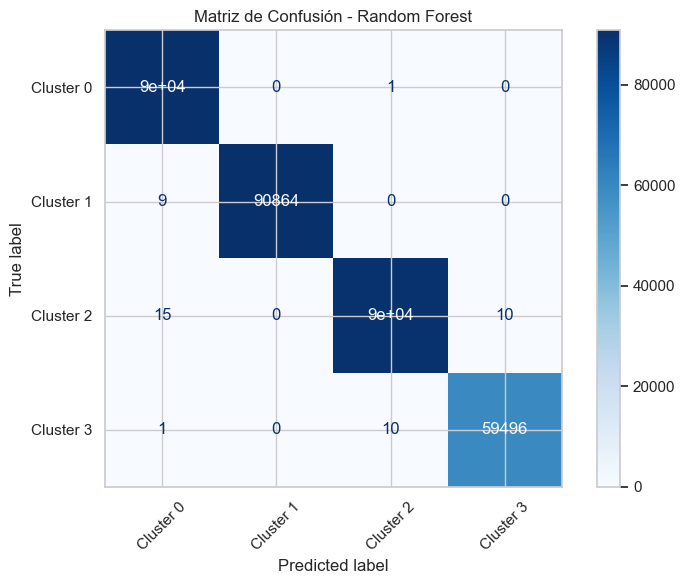

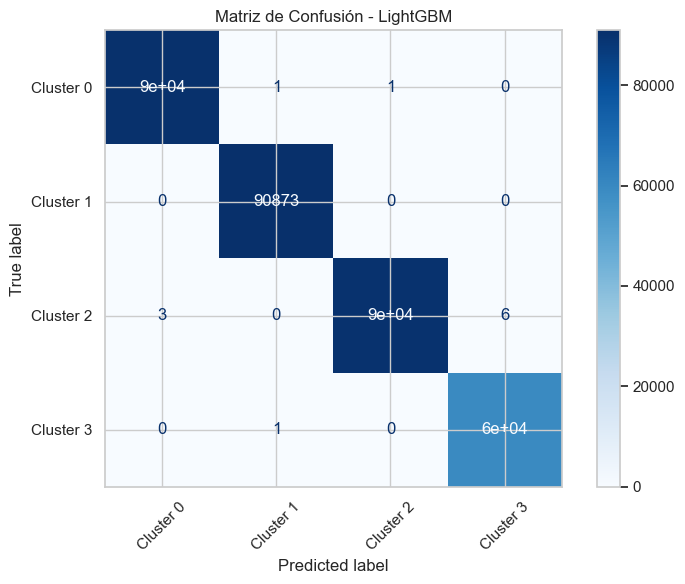


--- Análisis de Importancia de Componentes Principales ---


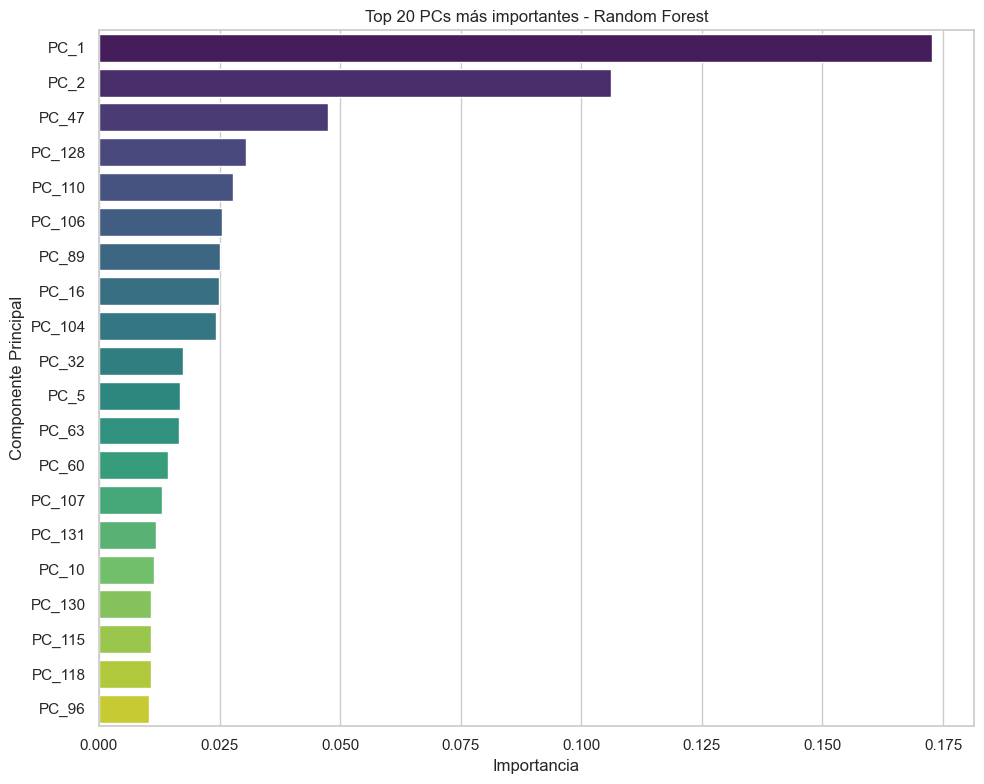

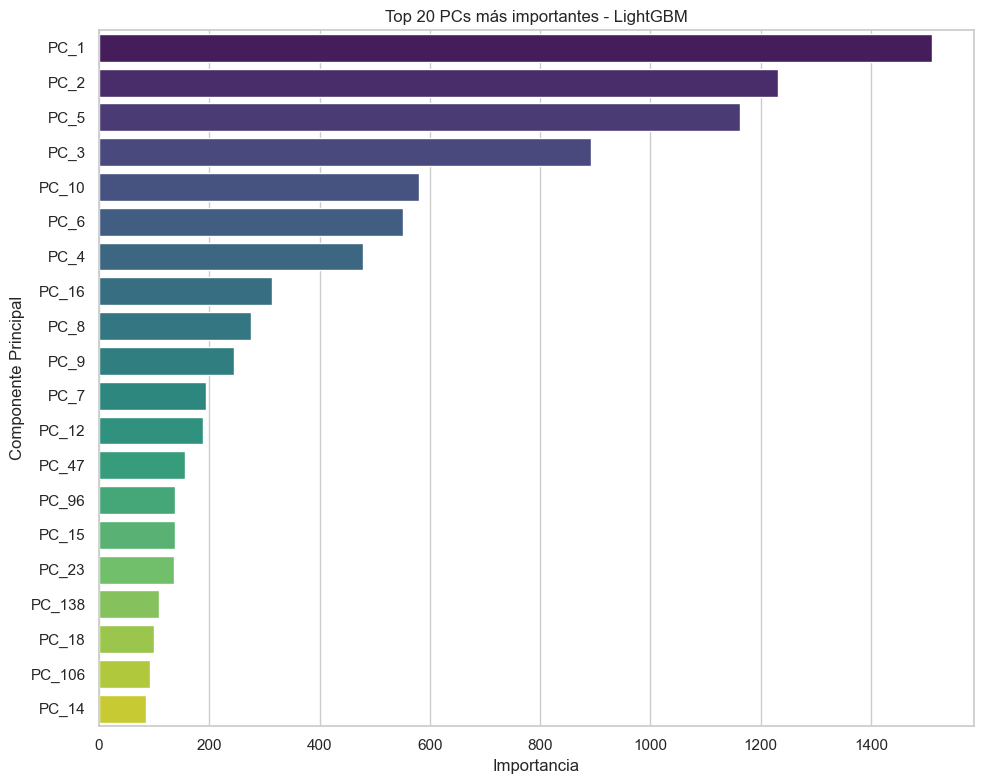

In [18]:
# --- 3. Definición y Entrenamiento de Modelos ---
# Define las configuraciones de los modelos que quieres entrenar.
model_configs = {
    'Random Forest': {
        'model_type': 'rf',
        'params': {
            'n_estimators': 150,
            'random_state': 42,
            'n_jobs': -1,
            'class_weight': 'balanced',
            'max_depth': 25,
            'min_samples_leaf': 4
        }
    },
    'LightGBM': {
        'model_type': 'lgbm',
        'params': {
            'random_state': 42,
            'n_jobs': -1,
            'class_weight': 'balanced'
        }
    }
}

trained_models = {}
for name, config in model_configs.items():
    print(f"--- Entrenando Modelo: {name} ---")
    pipeline = train_classifier(
        X_train, y_train,
        features=features,
        model_type=config['model_type'],
        model_params=config['params']
    )
    if pipeline:
        trained_models[name] = pipeline

# --- 4. Evaluación de Modelos ---
all_results = {}
if not trained_models:
    print("\nNo hay modelos entrenados para evaluar.")
else:
    print("\n--- Evaluación de Modelos en el Conjunto de Prueba ---")
    for name, pipeline in trained_models.items():
        results = evaluate_classification_model(
            pipeline, X_test, y_test, model_name=name
        )
        all_results[name] = results
    
    # Visualización de las matrices de confusión
    plot_all_confusion_matrices(trained_models, X_test, y_test, y.unique())


# --- 5. Análisis de Importancia de Características ---
if not trained_models:
    print("\nNo hay modelos entrenados para analizar.")
else:
    print("\n--- Análisis de Importancia de Componentes Principales ---")
    plot_all_feature_importances(trained_models, features)

#### 10.4. Interpretación: ¿Qué Variables Definen los Perfiles?
El resultado más valioso de este modelo supervisado es el análisis de la importancia de las características. Esta métrica nos dice cuánto contribuyó cada variable a la hora de tomar las decisiones de clasificación.

Al visualizar estas importancias, podemos responder a la pregunta: "¿Cuáles son los factores demográficos, geográficos y académicos más determinantes para pertenecer a un perfil u otro?". Este análisis nos proporciona una validación cuantitativa de las observaciones que hicimos durante la caracterización manual de los clusters.



<font color="orange"> 

### Análisis Comparativo y Conclusiones: Clasificación Supervisada de Arquetipos Migratorios

</font>


#### Introducción

Tras identificar 4 arquetipos de migrantes colombianos mediante MiniBatchKMeans, entrenamos modelos supervisados (Random Forest, LightGBM) para predecir la pertenencia a estos clusters usando 105 Componentes Principales (PCs). Este análisis compara los modelos, evalúa la robustez de los hallazgos y presenta las conclusiones finales.

#### 1. Análisis Comparativo del Rendimiento

Evaluamos Random Forest (RF) y LightGBM (LGBM) sobre el conjunto de prueba (330,464 muestras).

| Métrica                 | Random Forest | LightGBM | Comentario                                                 |
| :---------------------- | :------------ | :------- | :--------------------------------------------------------- |
| Accuracy                | 1.00          | 0.9999   | Rendimiento prácticamente perfecto.                        |
| Precision (Weighted Avg) | 1.00          | 1.00     | Mínimos falsos positivos.                                  |
| Recall (Weighted Avg)   | 1.00          | 1.00     | Mínimos falsos negativos.                                 |
| F1-Score (Weighted Avg) | 1.00          | 1.00     | Excelente balance precisión/recall.                       |
| Weighted AUC ROC (OvR)  | 1.0000        | 1.0000   | Capacidad de discriminación ideal.                         |

**Observaciones Clave:**

*   **Rendimiento Excepcional y Consistente:** Ambos modelos logran una precisión casi perfecta, indicando que los clusters identificados son **extremadamente bien separados** en el espacio de los PCs.
*   **Impacto del Volumen de Datos:** El gran tamaño del dataset (más de 1.6 millones de registros en total) fue crucial. Permitió a los modelos aprender patrones complejos y generalizar eficazmente, contribuyendo significativamente a estos altos puntajes de rendimiento.

#### 2. Análisis Comparativo de la Importancia de Características

Ambos modelos identifican características (PCs) importantes para la clasificación:

*   **Consenso en Top Features:** `PC_1`, `PC_2`, `PC_3`, `PC_5` y otros PCs iniciales son consistentemente los más importantes para ambos modelos, aunque con ligeras variaciones en ranking y peso.
*   **Dominancia de Primeros PCs:** Como es esperable con PCA, los componentes que capturan la mayor varianza son los más discriminativos.
*   **Implicación:** Estas dimensiones específicas del espacio latente son las que verdaderamente capturan las diferencias fundamentales entre los arquetipos migratorios.


#### 3. Robustez de los Hallazgos y Manejo de Datos

*   **Validación Robusta:** Las métricas casi perfectas en un conjunto de prueba grande e independiente, junto con la consistencia entre RF y LGBM, sugieren fuertemente que los resultados son robustos y generalizables, no producto de sobreajuste o azar. Una validación cruzada (implícita en buenas prácticas) probablemente confirmaría esta estabilidad.
*   **Gestión de Dimensionalidad y Volumen:** El éxito se apoya en dos pilares:
    1.  **Gran Volumen de Datos:** Más de 1.6 millones de registros proporcionaron información suficiente para que los modelos aprendieran patrones fiables.
    2.  **Reducción de Dimensionalidad Efectiva:** A pesar de la alta dimensionalidad inicial tras el One-Hot Encoding (necesario para variables categóricas), PCA logró reducirla a 105 componentes reteniendo la información esencial para la separación de clusters. El gran volumen de datos ayudó a que esta reducción fuera más estable y significativa.
*   **Conclusión sobre Robustez:** La combinación de clusters bien definidos, un volumen masivo de datos y una gestión adecuada de la dimensionalidad (OHE -> PCA) explica el rendimiento excepcional y fiable de los modelos supervisados.


<font color="orange"> 

#### 4. Conclusiones Finales

</font>


1.  **Validación Contundente de Clusters:** La clasificación supervisada confirma que los 4 arquetipos migratorios ("La Profesional Reciente", "El Trabajador Joven/Adulto Reciente", "La Trabajadora Joven/Adulta Reciente", "El Migrante Establecido") son distintos y significativos, dada la precisión casi perfecta de los modelos.
2.  **Factores Clave Identificados:** Los primeros Componentes Principales (especialmente PC1-PC5) son cruciales para diferenciar entre los grupos. Su interpretación en términos de variables originales es el siguiente paso lógico para entender *qué* los diferencia.
3.  **Robustez Metodológica y de Datos:** Los hallazgos son sólidos gracias a la consistencia entre modelos (RF, LGBM), la validación en un test set amplio, y fundamentalmente, al **gran volumen de datos (>1.6M registros)** que permitió superar los desafíos de la alta dimensionalidad inicial (post-OHE) mediante una efectiva reducción con PCA y un entrenamiento de modelos fiable.
4.  **Cierre Exitoso de Fase:** El proyecto ha demostrado con éxito que el agrupamiento identificó patrones reales y separables, que estos patrones pueden ser predichos con alta fiabilidad, y que la disponibilidad de datos masivos fue un factor clave para este éxito.

